<a href="https://colab.research.google.com/github/e-hkr/SR_practice/blob/main/visualization1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 準備

In [ ]:
!pip install japanize-matplotlib

# imports
import pickle
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
import matplotlib.animation as animation

In [ ]:
BASE_DIR = 'xxx'

# データの読み込み
with open(f'{BASE_DIR}/results/pred.pickle', 'rb') as f:
  data = pickle.load(f)

# graphs・images

__グラフ・画像__  
【凡例】P：降水量、T：気温、R：湿数、U：東西風、V：南北風、W：風速、D：風向
1. サンプル(P○→P○)_PW
1. サンプル(P○→P○)_TW
1. サンプル(P○→P○)_RW
1. サンプル(P○→P×)_PW
1. サンプル(P○→P×)_TW
1. サンプル(P○→P×)_RW
1. サンプル(P×→P○)_PW
1. サンプル(P×→P○)_TW
1. サンプル(P×→P○)_RW
1. サンプル(P×→P×)_PW
1. サンプル(P×→P×)_TW
1. サンプル(P×→P×)_RW
1. ヒストグラム_P
1. ヒストグラム_T
1. ヒストグラム_R
1. ヒストグラム_U
1. ヒストグラム_V
1. ヒストグラム_W
1. ヒストグラム_D
1. 領域合計降水量の時系列
1. 領域平均気温の時系列
1. 領域平均湿数の時系列
1. 領域平均風速の時系列
1. 領域最大風速の時系列

## サンプル

○：降水あり  
×：降水なし  
入力データ→正解データ

### ○→○

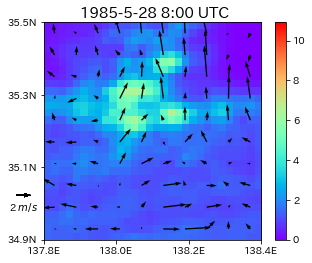

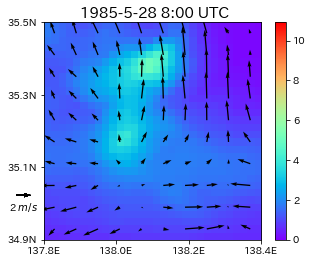

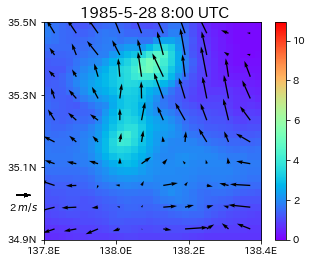

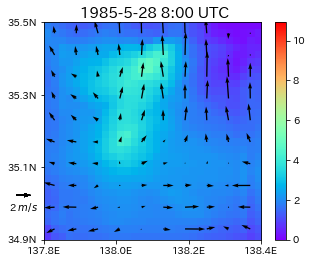

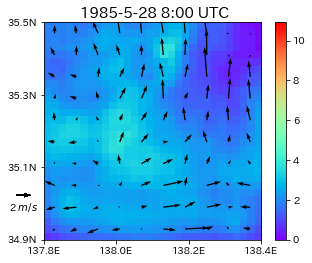

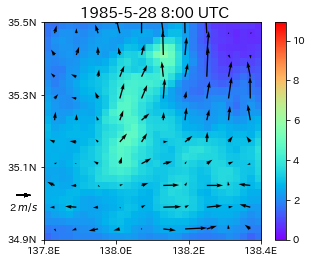

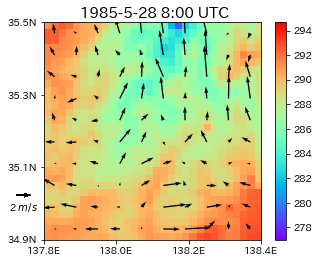

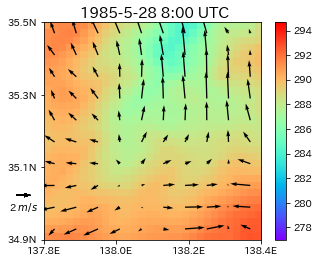

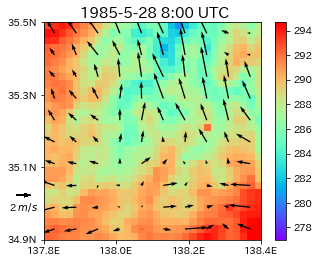

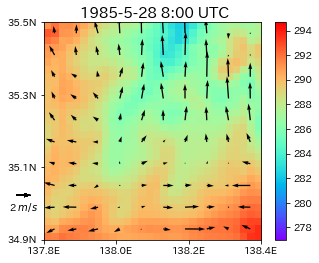

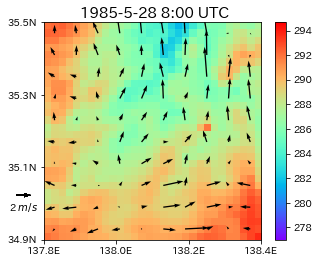

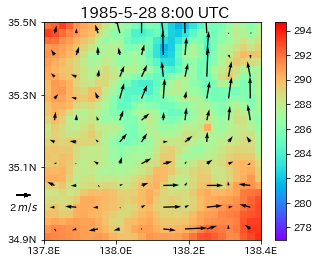

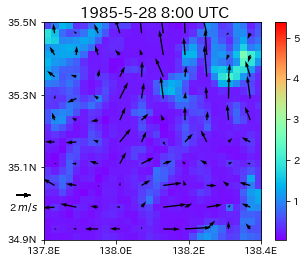

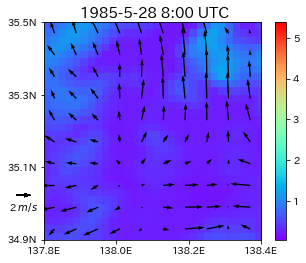

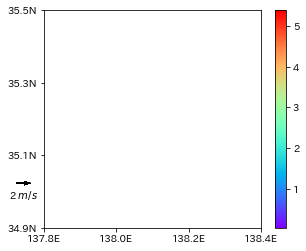

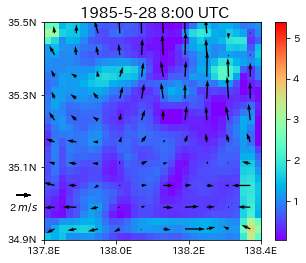

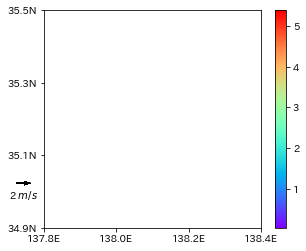

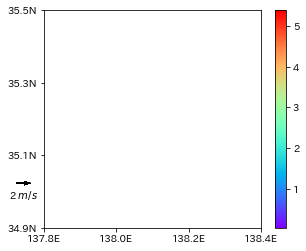

In [ ]:
# ○→○
start, end = 6454, 6466
times = [*[f'1985-5-27 {time}:00 UTC' for time in range(21,24)], *[f'1985-5-28 {time}:00 UTC' for time in range(9)]]
nets = ['true', 'input', 'MLP', 'SRCNN', 'UNet', 'SE-SRResNet']
variables = ['P', 'T', 'R']
X = [list(range(1,30,3)) for _ in range(1,30,3)]
Y = [[_]*10 for _ in range(1,30,3)]
for k,variable in enumerate(variables):
  for j,net in enumerate(nets):
    fig = plt.figure(figsize=(5,4))
    ax = fig.add_subplot(111)
    pmin, pmax, ims = data[start:end,900*k:900*(k+1)].min(), data[start:end,900*k:900*(k+1)].max(), []
    im = ax.imshow(np.zeros((30,30)), cmap='gray', animated=True, vmin=pmin, vmax=pmax)
    ims.append([im])
    for i,t in enumerate(times):
      im = ax.imshow(data[i+start,6300*j+900*k:6300*j+900*(k+1)].reshape((30,30))[::-1], cmap='rainbow', animated=True, vmin=pmin, vmax=pmax)
      im2 = ax.quiver(X, Y, data[i+start,j*6300+2700:j*6300+3600].reshape((30,30))[1::3,1::3], -data[i+start,j*6300+3600:j*6300+4500].reshape((30,30))[28::-3,1::3], animated=True, angles='xy', scale_units='xy', scale=1)
      if i==0:
        plt.quiverkey(im2, 0.085, 0.28, 2, '2 $m/s$', labelpos='S', coordinates='figure', labelsep=0.08)
        cbar = fig.colorbar(im, ax=ax)
        cbar.min, cbar.max = pmin, pmax
      ax.set_xticks(ticks=[-0.5,9.5,19.5,29.5])
      ax.set_xticklabels(['137.8E','138.0E','138.2E','138.4E'])
      ax.set_yticks(ticks=[-0.5,9.5,19.5,29.5])
      ax.set_yticklabels(['35.5N','35.3N','35.1N','34.9N'])
      im3 = ax.text(4.5, -1.1, t, animated=True, fontsize=15)
      ims.append([im,im2,im3])
    ani = animation.ArtistAnimation(fig, ims, interval=500, repeat_delay=1000)
    ani.save(f'{BASE_DIR}/images/sample{variable}_{net}_rainbow_85-5-27-21_85-5-28-8.gif', writer='pillow')

### ○→×

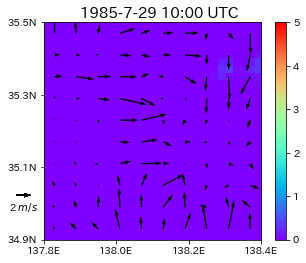

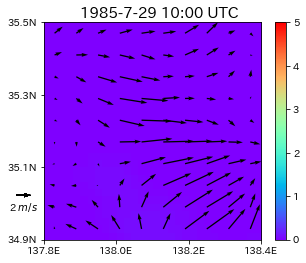

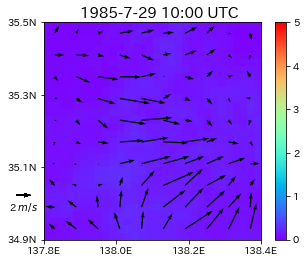

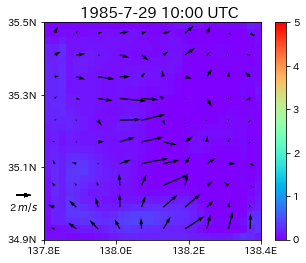

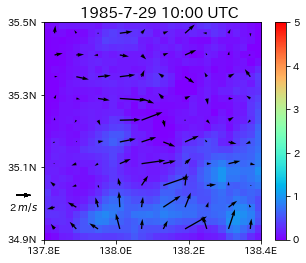

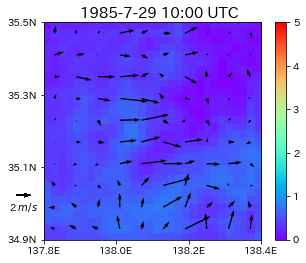

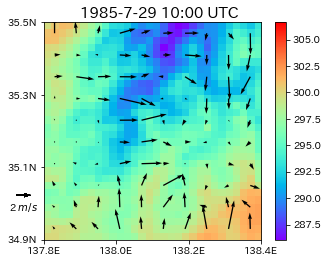

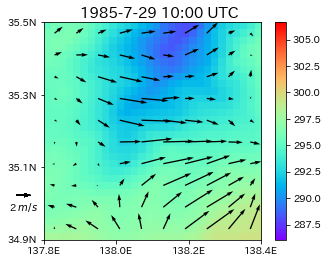

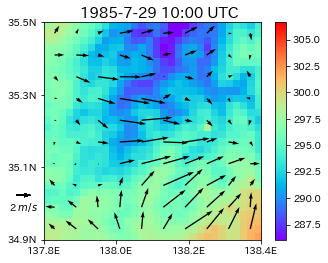

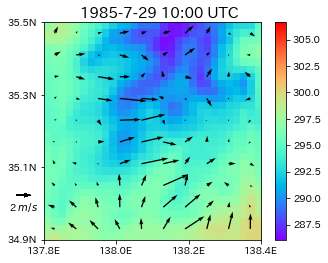

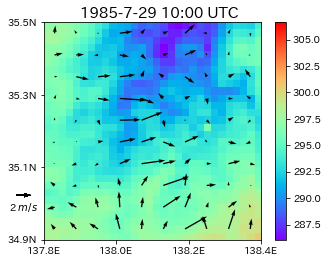

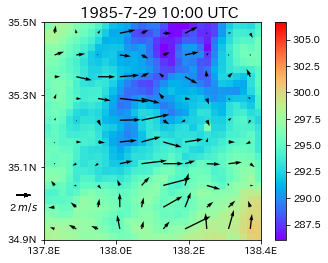

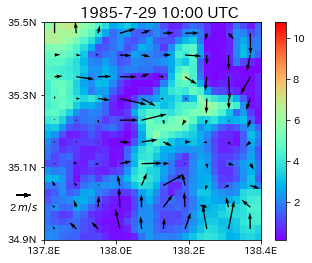

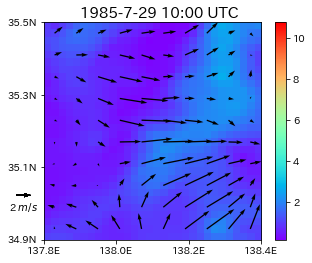

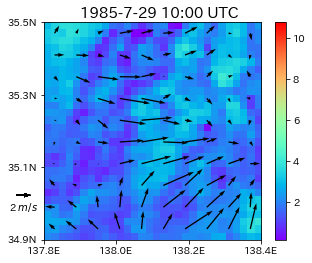

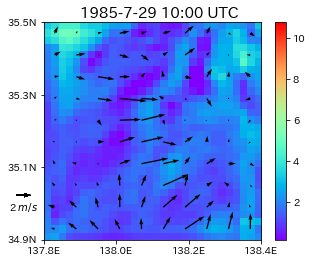

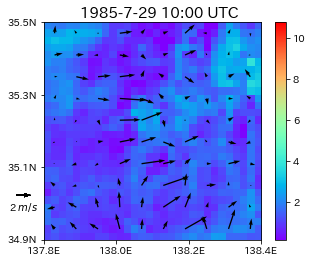

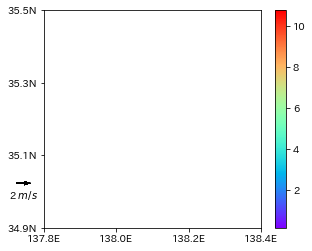

In [ ]:
# ○→×
start, end = 7945, 7955
times = [f'1985-7-29 {time}:00 UTC' for time in range(11)]
nets = ['true', 'input', 'MLP', 'SRCNN', 'UNet', 'SE-SRResNet']
variables = ['P', 'T', 'R']
X = [list(range(1,30,3)) for _ in range(1,30,3)]
Y = [[_]*10 for _ in range(1,30,3)]
for k,variable in enumerate(variables):
  for j,net in enumerate(nets):
    fig = plt.figure(figsize=(5,4))
    ax = fig.add_subplot(111)
    if k==0:
      pmin, pmax, ims = 0, 5, []
    else:
      pmin, pmax, ims = data[start:end,900*k:900*(k+1)].min(), data[start:end,900*k:900*(k+1)].max(), []
    im = ax.imshow(np.zeros((30,30)), cmap='gray', animated=True, vmin=pmin, vmax=pmax)
    ims.append([im])
    for i,t in enumerate(times):
      im = ax.imshow(data[i+start,6300*j+900*k:6300*j+900*(k+1)].reshape((30,30))[::-1], cmap='rainbow', animated=True, vmin=pmin, vmax=pmax)
      im2 = ax.quiver(X, Y, data[i+start,j*6300+2700:j*6300+3600].reshape((30,30))[1::3,1::3], -data[i+start,j*6300+3600:j*6300+4500].reshape((30,30))[28::-3,1::3], animated=True, angles='xy', scale_units='xy', scale=1)
      if i==0:
        plt.quiverkey(im2, 0.085, 0.28, 2, '2 $m/s$', labelpos='S', coordinates='figure', labelsep=0.08)
        cbar = fig.colorbar(im, ax=ax)
        cbar.min, cbar.max = pmin, pmax
      ax.set_xticks(ticks=[-0.5,9.5,19.5,29.5])
      ax.set_xticklabels(['137.8E','138.0E','138.2E','138.4E'])
      ax.set_yticks(ticks=[-0.5,9.5,19.5,29.5])
      ax.set_yticklabels(['35.5N','35.3N','35.1N','34.9N'])
      im3 = ax.text(4.5, -1.1, t, animated=True, fontsize=15)
      ims.append([im,im2,im3])
    ani = animation.ArtistAnimation(fig, ims, interval=500, repeat_delay=1000)
    ani.save(f'{BASE_DIR}/images/sample{variable}_{net}_rainbow_85-7-29-0_85-7-29-9.gif', writer='pillow')

### ×→○

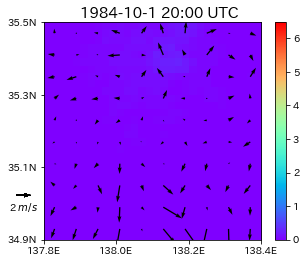

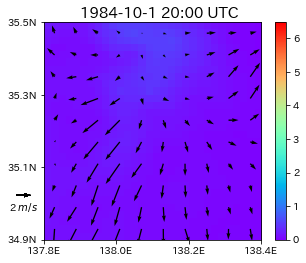

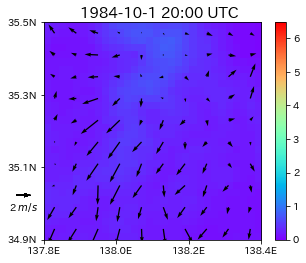

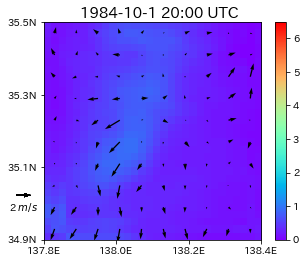

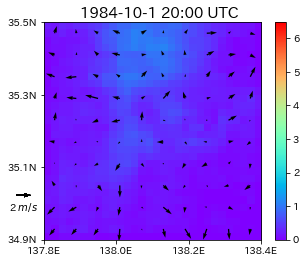

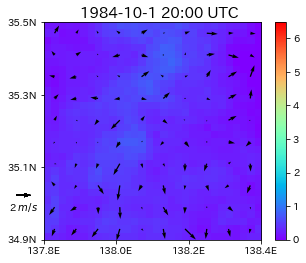

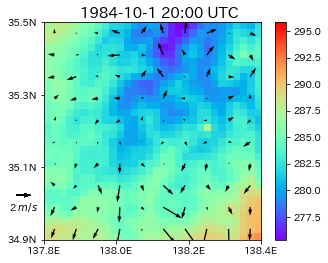

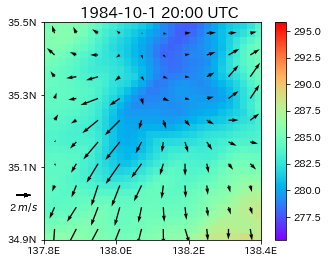

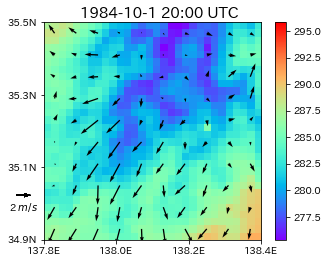

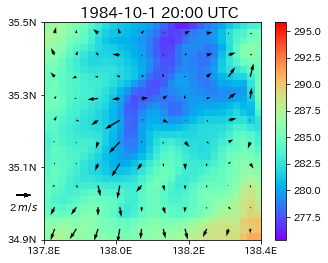

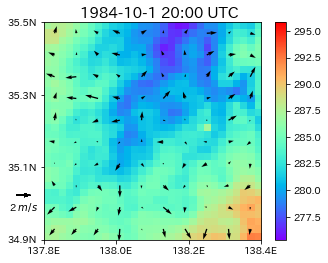

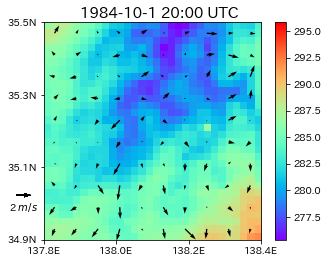

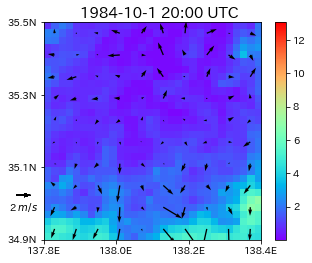

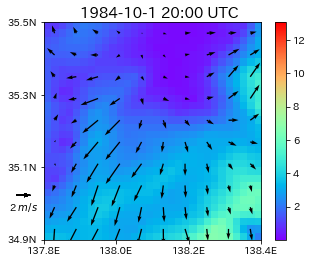

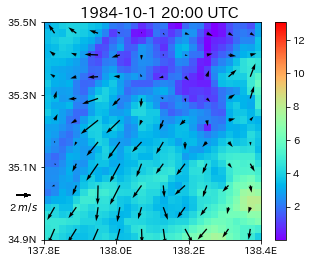

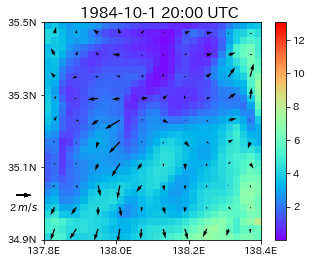

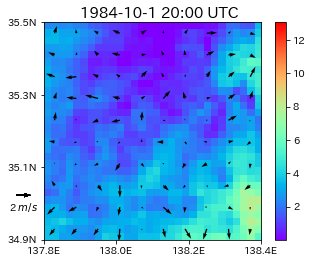

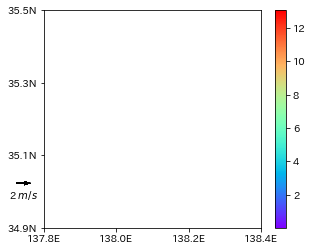

In [ ]:
# ×→○
start, end = 722, 742
times = [f'1984-10-1 {time}:00 UTC' for time in range(1,21)]
nets = ['true', 'input', 'MLP', 'SRCNN', 'UNet', 'SE-SRResNet']
variables = ['P', 'T', 'R']
X = [list(range(1,30,3)) for _ in range(1,30,3)]
Y = [[_]*10 for _ in range(1,30,3)]
for k,variable in enumerate(variables):
  for j,net in enumerate(nets):
    fig = plt.figure(figsize=(5,4))
    ax = fig.add_subplot(111)
    pmin, pmax, ims = data[start:end,900*k:900*(k+1)].min(), data[start:end,900*k:900*(k+1)].max(), []
    im = ax.imshow(np.zeros((30,30)), cmap='gray', animated=True, vmin=pmin, vmax=pmax)
    ims.append([im])
    for i,t in enumerate(times):
      im = ax.imshow(data[i+start,6300*j+900*k:6300*j+900*(k+1)].reshape((30,30))[::-1], cmap='rainbow', animated=True, vmin=pmin, vmax=pmax)
      im2 = ax.quiver(X, Y, data[i+start,j*6300+2700:j*6300+3600].reshape((30,30))[1::3,1::3], -data[i+start,j*6300+3600:j*6300+4500].reshape((30,30))[28::-3,1::3], animated=True, angles='xy', scale_units='xy', scale=1)
      if i==0:
        plt.quiverkey(im2, 0.085, 0.28, 2, '2 $m/s$', labelpos='S', coordinates='figure', labelsep=0.08)
        cbar = fig.colorbar(im, ax=ax)
        cbar.min, cbar.max = pmin, pmax
      ax.set_xticks(ticks=[-0.5,9.5,19.5,29.5])
      ax.set_xticklabels(['137.8E','138.0E','138.2E','138.4E'])
      ax.set_yticks(ticks=[-0.5,9.5,19.5,29.5])
      ax.set_yticklabels(['35.5N','35.3N','35.1N','34.9N'])
      im3 = ax.text(4.5, -1.1, t, animated=True, fontsize=15)
      ims.append([im,im2,im3])
    ani = animation.ArtistAnimation(fig, ims, interval=500, repeat_delay=1000)
    ani.save(f'{BASE_DIR}/images/sample{variable}_{net}_rainbow_84-10-1-1_84-10-1-20.gif', writer='pillow')

### ×→×

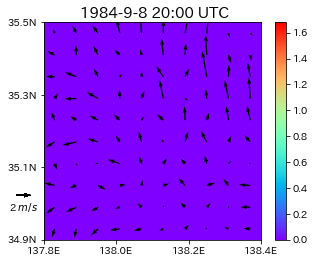

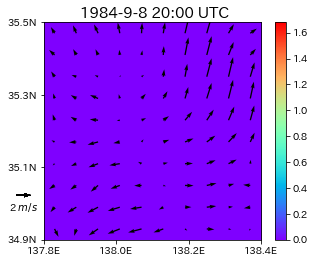

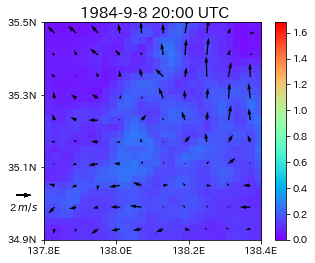

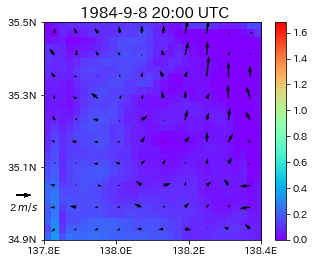

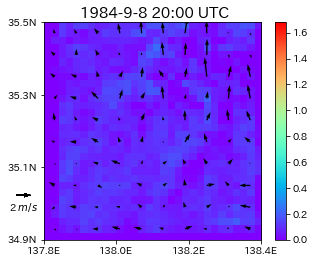

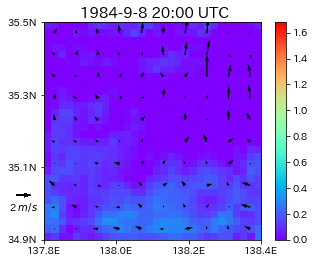

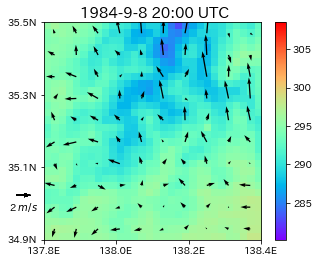

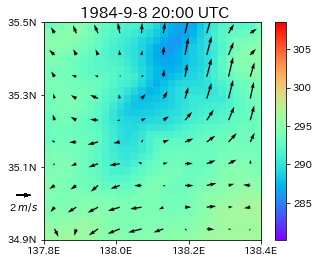

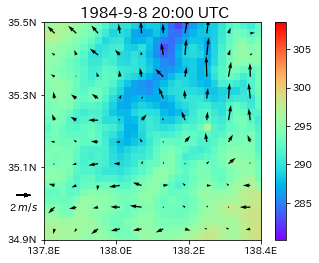

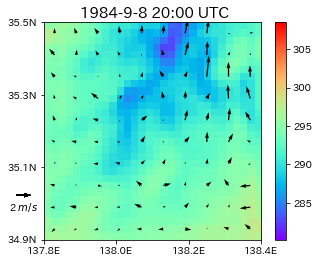

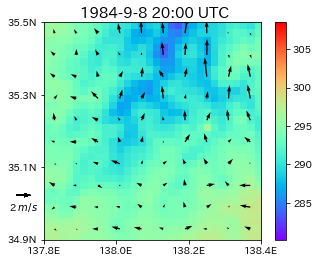

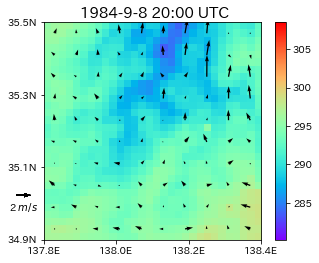

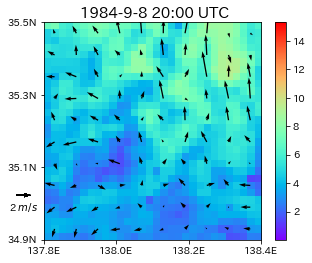

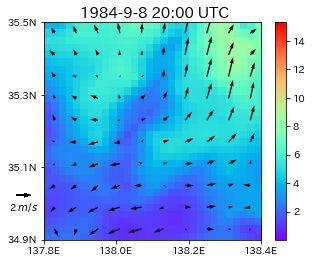

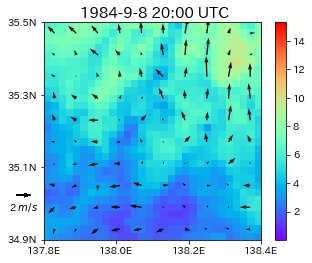

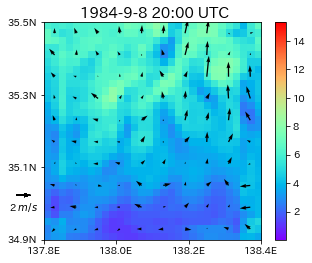

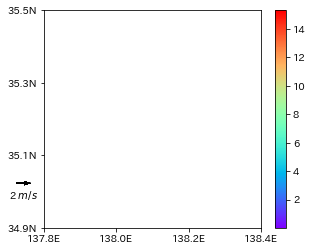

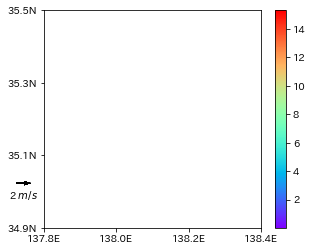

In [ ]:
# ×→×
start, end = 170, 190
times = [f'1984-9-8 {time}:00 UTC' for time in range(1,21)]
nets = ['true', 'input', 'MLP', 'SRCNN', 'UNet', 'SE-SRResNet']
variables = ['P', 'T', 'R']
X = [list(range(1,30,3)) for _ in range(1,30,3)]
Y = [[_]*10 for _ in range(1,30,3)]
for k,variable in enumerate(variables):
  for j,net in enumerate(nets):
    fig = plt.figure(figsize=(5,4))
    ax = fig.add_subplot(111)
    if k==0:
      pmin, pmax, ims = 0, 1.68, []
    else:
      pmin, pmax, ims = data[start:end,900*k:900*(k+1)].min(), data[start:end,900*k:900*(k+1)].max(), []
    im = ax.imshow(np.zeros((30,30)), cmap='gray', animated=True, vmin=pmin, vmax=pmax)
    ims.append([im])
    for i,t in enumerate(times):
      im = ax.imshow(data[i+start,6300*j+900*k:6300*j+900*(k+1)].reshape((30,30))[::-1], cmap='rainbow', animated=True, vmin=pmin, vmax=pmax)
      im2 = ax.quiver(X, Y, data[i+start,j*6300+2700:j*6300+3600].reshape((30,30))[1::3,1::3], -data[i+start,j*6300+3600:j*6300+4500].reshape((30,30))[28::-3,1::3], animated=True, angles='xy', scale_units='xy', scale=1)
      if i==0:
        plt.quiverkey(im2, 0.085, 0.28, 2, '2 $m/s$', labelpos='S', coordinates='figure', labelsep=0.08)
        cbar = fig.colorbar(im, ax=ax)
        cbar.min, cbar.max = pmin, pmax
      ax.set_xticks(ticks=[-0.5,9.5,19.5,29.5])
      ax.set_xticklabels(['137.8E','138.0E','138.2E','138.4E'])
      ax.set_yticks(ticks=[-0.5,9.5,19.5,29.5])
      ax.set_yticklabels(['35.5N','35.3N','35.1N','34.9N'])
      im3 = ax.text(4.5, -1.1, t, animated=True, fontsize=15)
      ims.append([im,im2,im3])
    ani = animation.ArtistAnimation(fig, ims, interval=500, repeat_delay=1000)
    ani.save(f'{BASE_DIR}/images/sample{variable}_{net}_rainbow_84-9-8-1_84-9-8-20.gif', writer='pillow')

## ヒストグラム

### 降水量(P)

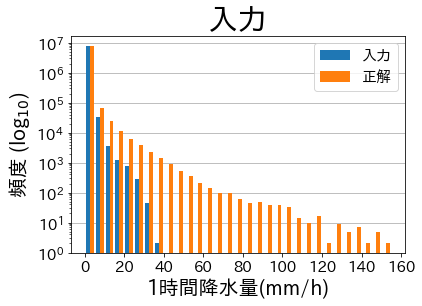

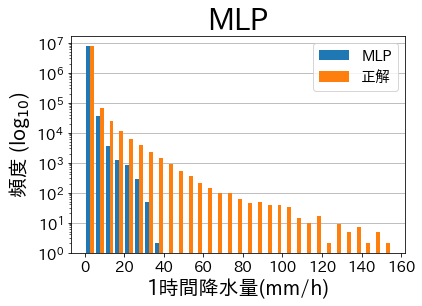

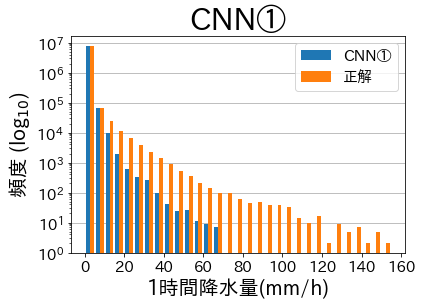

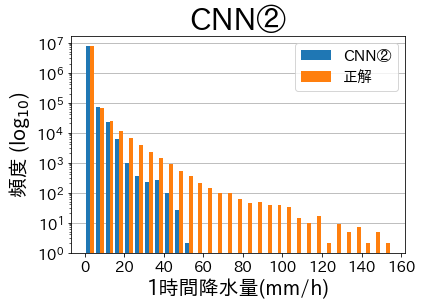

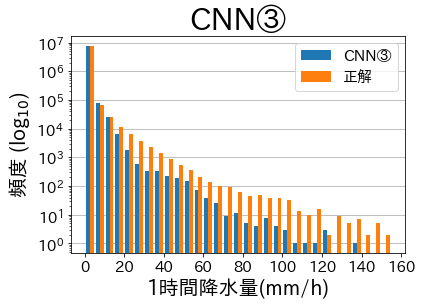

In [ ]:
titles = ['正解', '入力', 'MLP', 'CNN①', 'CNN②', 'CNN③']
edges = range(0, 156, 5)
for i, title in enumerate(titles[1:]):
  plt.hist([data[:,(i+1)*6300:(i+1)*6300+900].reshape(-1), data[:,:900].reshape(-1)], bins=edges, rwidth=0.8)
  # plt.hist(data[:,:900].reshape(-1), bins=edges, rwidth=0.8)
  plt.yscale('log')
  plt.xlabel('1時間降水量(mm/h)', fontsize=20)# Precipitation Per Hour
  plt.ylabel('頻度 (log$_{10}$)', fontsize=20)# Frequency
  plt.xticks(fontsize=15)
  plt.yticks(fontsize=15)
  plt.title(title, fontsize=30)
  plt.rcParams['axes.axisbelow'] = True
  plt.grid(axis='y')
  plt.legend([title, titles[0]], fontsize=15)
  plt.show()

### 気温(T)

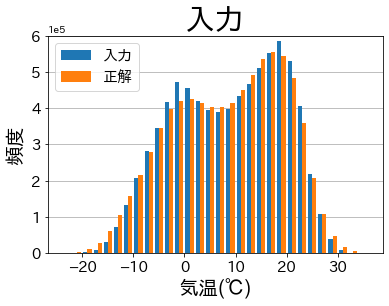

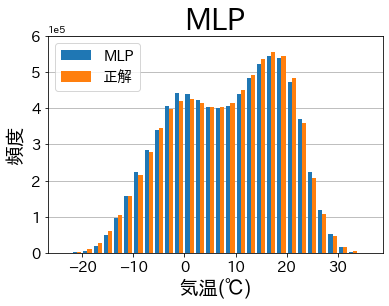

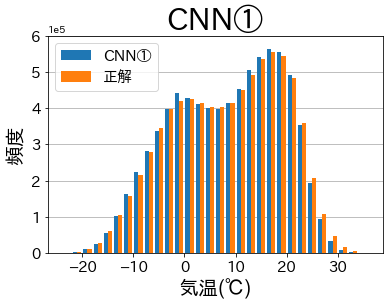

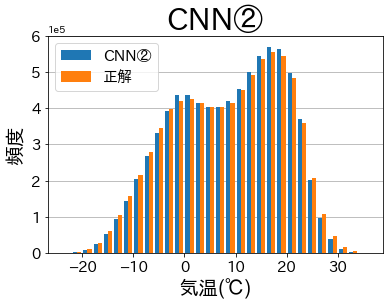

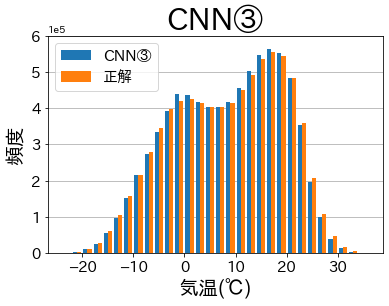

In [ ]:
titles = ['正解', '入力', 'MLP', 'CNN①', 'CNN②', 'CNN③']
edges = range(-24, 38, 2)
for i, title in enumerate(titles[1:]):
  plt.hist([data[:,(i+1)*6300+900:(i+1)*6300+1800].reshape(-1) - 273.15, data[:,900:1800].reshape(-1) - 273.15], bins=edges, rwidth=0.8)
  # plt.hist(data[:,:900].reshape(-1), bins=edges, rwidth=0.8)
  # plt.yscale('log')
  plt.xlabel('気温(℃)', fontsize=20)# Precipitation Per Hour
  plt.ylabel('頻度', fontsize=20)# Frequency
  plt.xticks(fontsize=15)
  plt.yticks(fontsize=15)
  plt.ylim(0,600000)
  plt.title(title, fontsize=30)
  plt.rcParams['axes.axisbelow'] = True
  plt.ticklabel_format(style="sci", axis="y", scilimits=(0,0))
  plt.grid(axis='y')
  plt.legend([title, titles[0]], loc='upper left', fontsize=15)
  plt.show()

### 湿度(R)

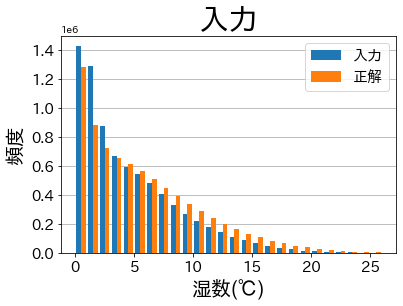

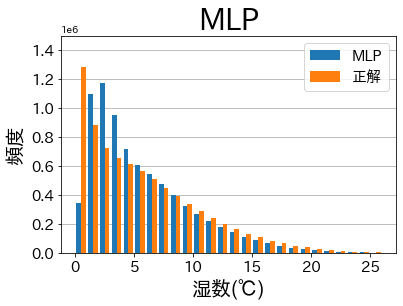

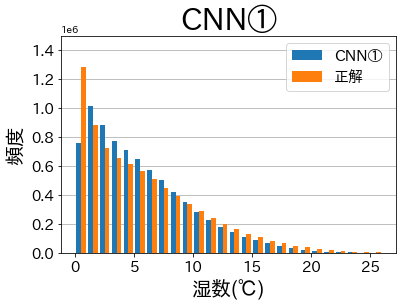

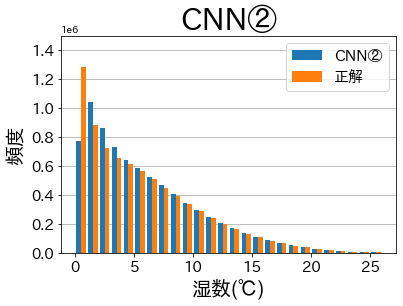

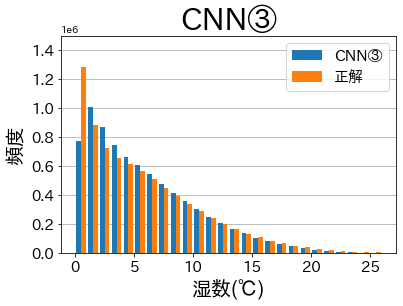

In [ ]:
titles = ['正解', '入力', 'MLP', 'CNN①', 'CNN②', 'CNN③']
edges = range(0, 27, 1)
for i, title in enumerate(titles[1:]):
  plt.hist([data[:,(i+1)*6300+1800:(i+1)*6300+2700].reshape(-1), data[:,1800:2700].reshape(-1)], bins=edges, rwidth=0.8)
  # plt.hist(data[:,:900].reshape(-1), bins=edges, rwidth=0.8)
  # plt.yscale('log')
  plt.xlabel('湿数(℃)', fontsize=20)# Precipitation Per Hour
  plt.ylabel('頻度', fontsize=20)# Frequency
  plt.xticks(fontsize=15)
  plt.yticks(fontsize=15)
  plt.ylim(0,1500000)
  plt.title(title, fontsize=30)
  plt.rcParams['axes.axisbelow'] = True
  plt.ticklabel_format(style="sci", axis="y", scilimits=(0,0))
  plt.grid(axis='y')
  plt.legend([title, titles[0]], loc='upper right', fontsize=15)
  plt.show()

### 東西風(U)

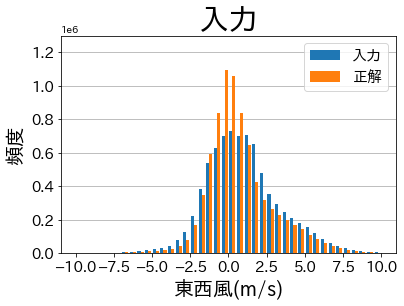

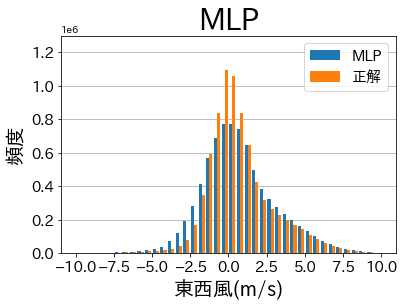

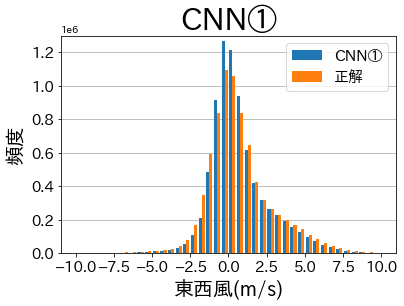

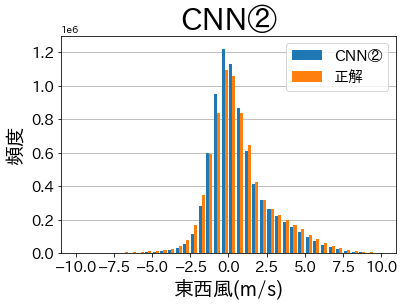

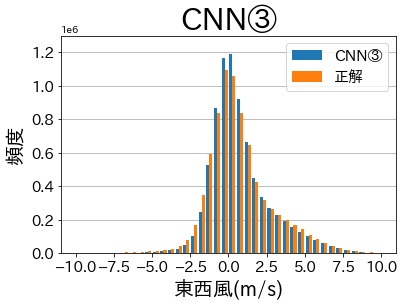

In [ ]:
titles = ['正解', '入力', 'MLP', 'CNN①', 'CNN②', 'CNN③']
edges = np.arange(-10, 10.5, 0.5)
for i, title in enumerate(titles[1:]):
  plt.hist([data[:,(i+1)*6300+2700:(i+1)*6300+3600].reshape(-1), data[:,2700:3600].reshape(-1)], bins=edges, rwidth=0.8)
  # plt.hist(data[:,:900].reshape(-1), bins=edges, rwidth=0.8)
  # plt.yscale('log')
  plt.xlabel('東西風(m/s)', fontsize=20)# Precipitation Per Hour
  plt.ylabel('頻度', fontsize=20)# Frequency
  plt.xticks(fontsize=15)
  plt.yticks(fontsize=15)
  plt.ylim(0,1300000)
  plt.title(title, fontsize=30)
  plt.rcParams['axes.axisbelow'] = True
  plt.ticklabel_format(style="sci", axis="y", scilimits=(0,0))
  plt.grid(axis='y')
  plt.legend([title, titles[0]], loc='upper right', fontsize=15)
  plt.show()

### 南北風(V)

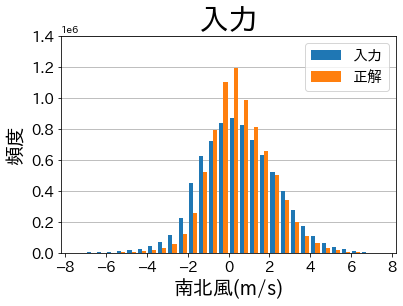

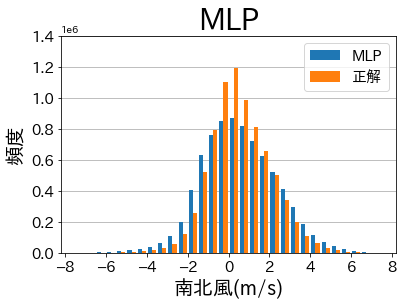

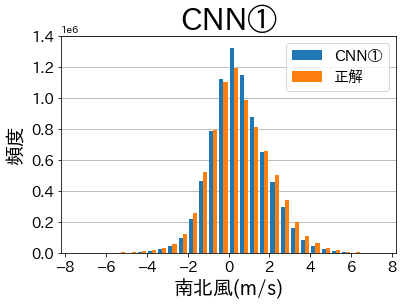

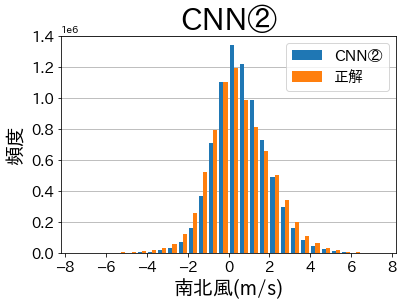

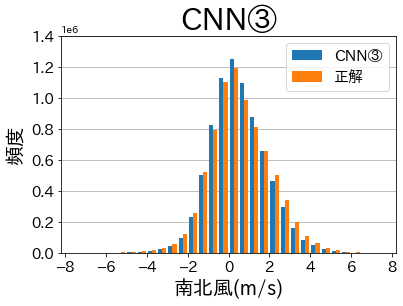

In [ ]:
titles = ['正解', '入力', 'MLP', 'CNN①', 'CNN②', 'CNN③']
edges = np.arange(-7.5, 8, 0.5)
for i, title in enumerate(titles[1:]):
  plt.hist([data[:,(i+1)*6300+3600:(i+1)*6300+4500].reshape(-1), data[:,3600:4500].reshape(-1)], bins=edges, rwidth=0.8)
  # plt.hist(data[:,:900].reshape(-1), bins=edges, rwidth=0.8)
  # plt.yscale('log')
  plt.xlabel('南北風(m/s)', fontsize=20)# Precipitation Per Hour
  plt.ylabel('頻度', fontsize=20)# Frequency
  plt.xticks(fontsize=15)
  plt.yticks(fontsize=15)
  plt.ylim(0,1400000)
  plt.title(title, fontsize=30)
  plt.rcParams['axes.axisbelow'] = True
  plt.ticklabel_format(style="sci", axis="y", scilimits=(0,0))
  plt.grid(axis='y')
  plt.legend([title, titles[0]], loc='upper right', fontsize=15)
  plt.show()

### 風速(W)

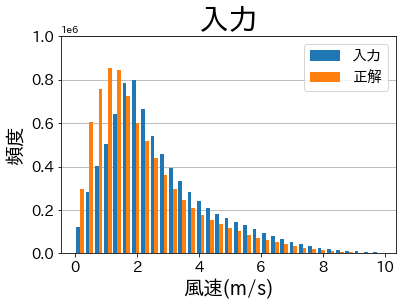

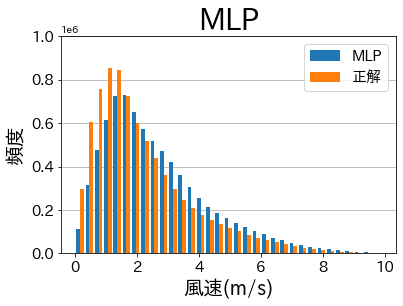

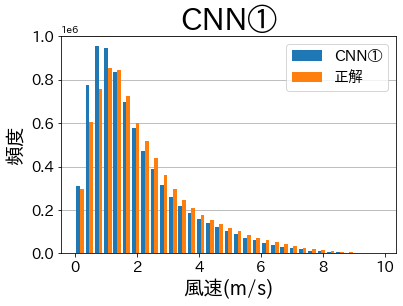

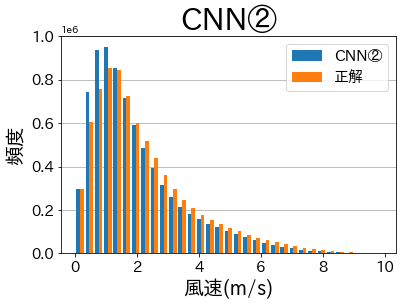

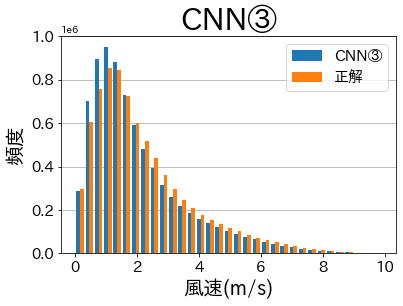

In [ ]:
titles = ['正解', '入力', 'MLP', 'CNN①', 'CNN②', 'CNN③']
edges = np.arange(0, 10, 0.3)
for i, title in enumerate(titles[1:]):
  plt.hist([data[:,(i+1)*6300+4500:(i+1)*6300+5400].reshape(-1), data[:,4500:5400].reshape(-1)], bins=edges, rwidth=0.8)
  # plt.yscale('log')
  plt.xlabel('風速(m/s)', fontsize=20)# Precipitation Per Hour
  plt.ylabel('頻度', fontsize=20)# Frequency
  plt.xticks(fontsize=15)
  plt.yticks(fontsize=15)
  plt.ylim(0,1000000)
  plt.title(title, fontsize=30)
  plt.rcParams['axes.axisbelow'] = True
  plt.ticklabel_format(style="sci", axis="y", scilimits=(0,0))
  plt.grid(axis='y')
  plt.legend([title, titles[0]], loc='upper right', fontsize=15)
  plt.show()

### 風向(D)

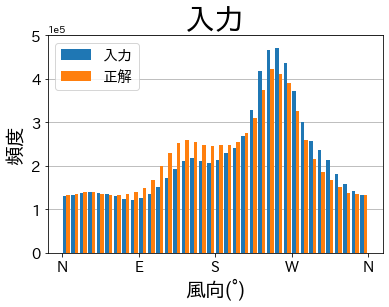

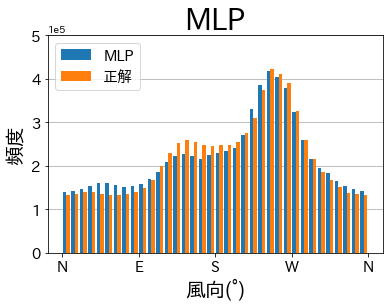

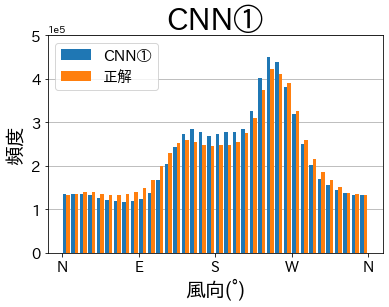

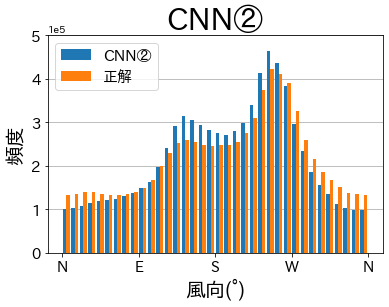

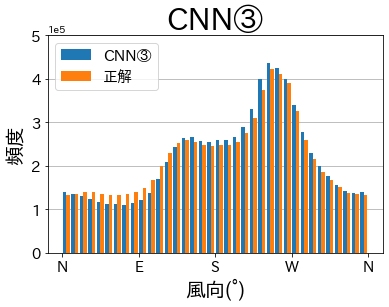

In [ ]:
titles = ['正解', '入力', 'MLP', 'CNN①', 'CNN②', 'CNN③']
edges = np.arange(0, 361, 10)
for i, title in enumerate(titles[1:]):
  plt.hist([data[:,(i+1)*6300+5400:(i+1)*6300+6300].reshape(-1), data[:,5400:6300].reshape(-1)], bins=edges, rwidth=0.8)
  # plt.yscale('log')
  plt.xlabel('風向(°)', fontsize=20)# Precipitation Per Hour
  plt.ylabel('頻度', fontsize=20)# Frequency
  plt.xticks([0,90,180,270,360], ['N', 'E', 'S', 'W', 'N'], fontsize=15)
  plt.yticks(fontsize=15)
  plt.ylim(0,500000)
  plt.title(title, fontsize=30)
  plt.rcParams['axes.axisbelow'] = True
  plt.ticklabel_format(style="sci", axis="y", scilimits=(0,0))
  plt.grid(axis='y')
  plt.legend([title, titles[0]], loc='upper left', fontsize=15)
  plt.show()

## 時系列グラフ

### 降水量(P)

#### 領域合計降水量

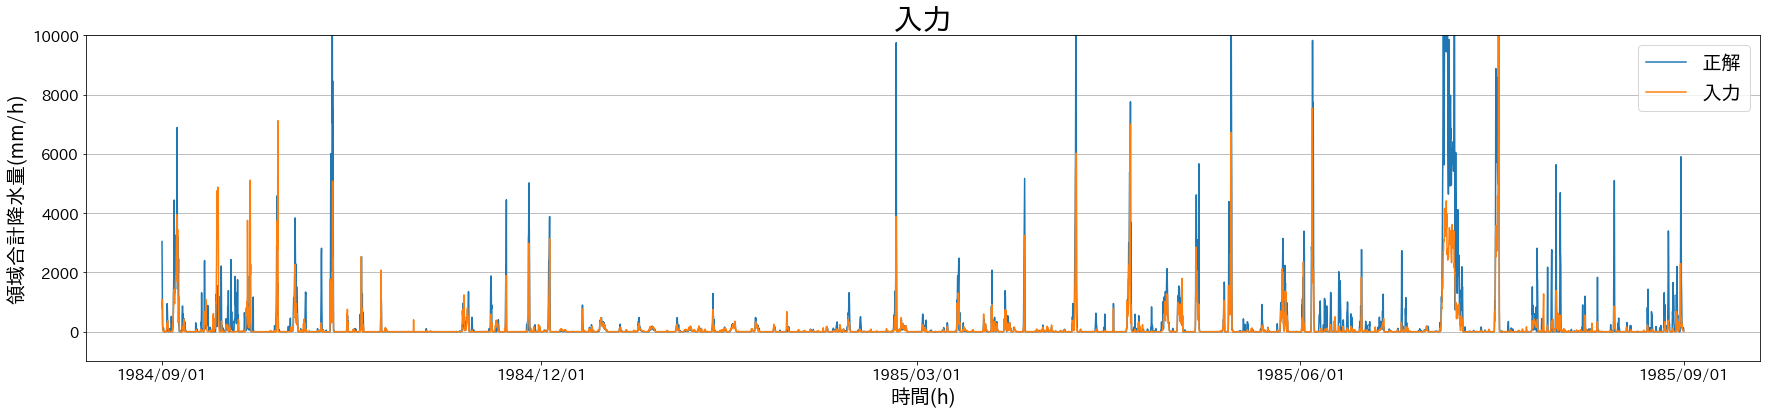

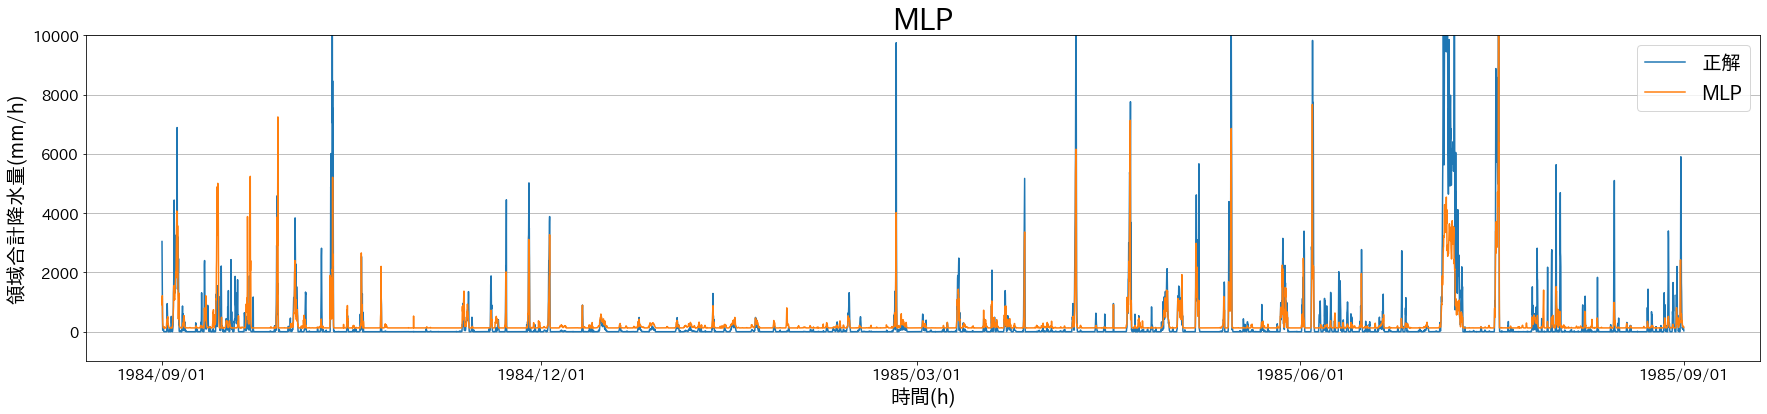

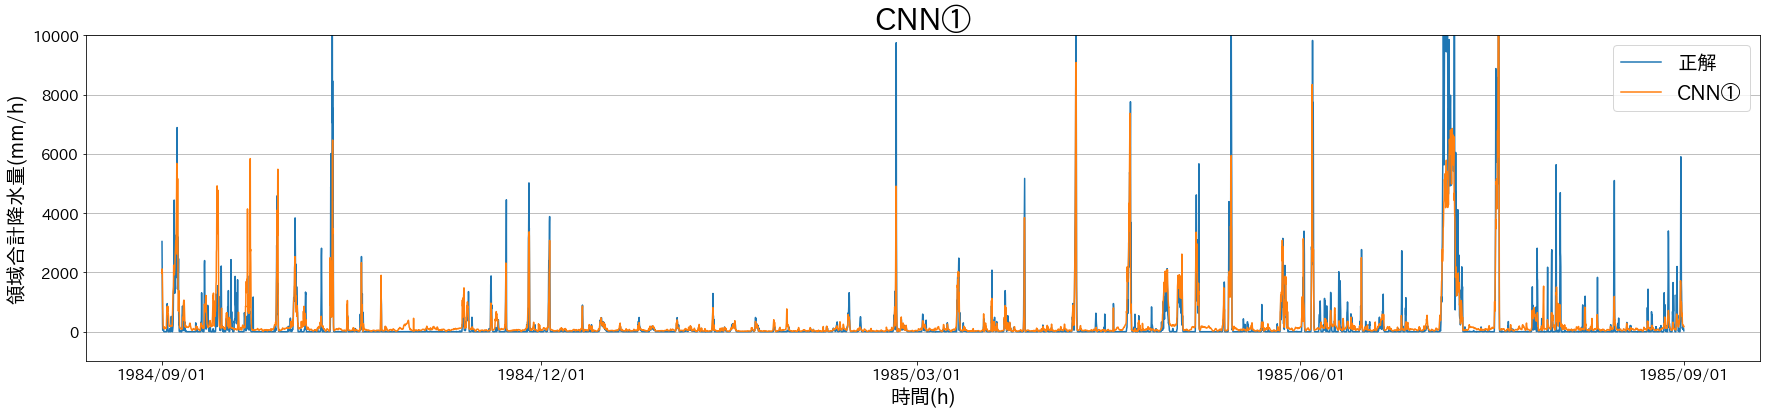

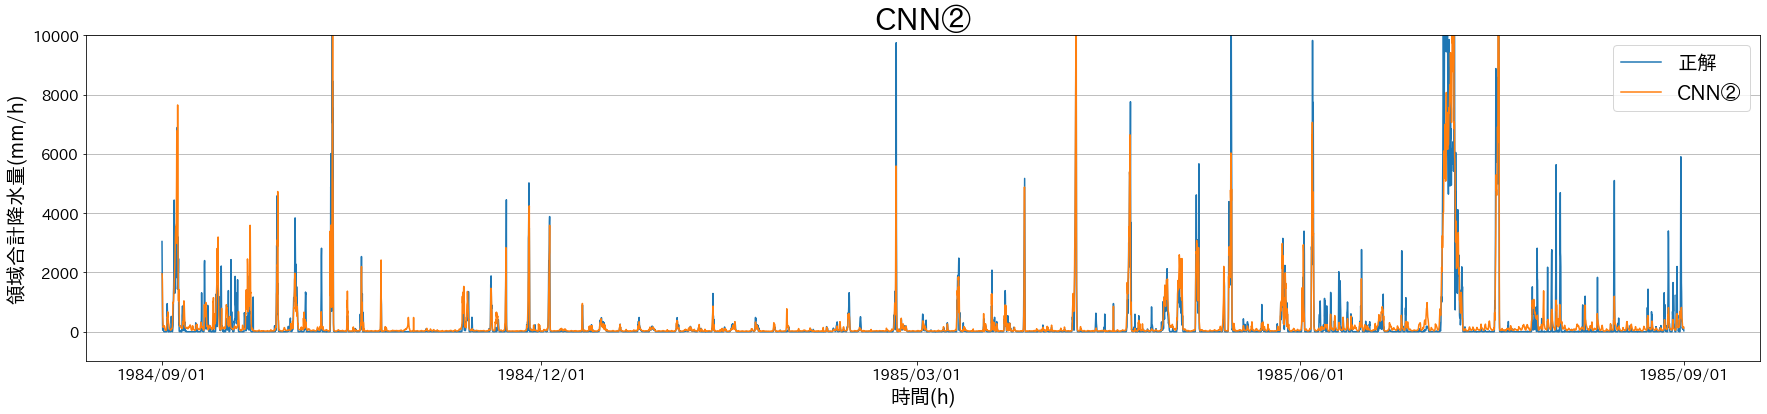

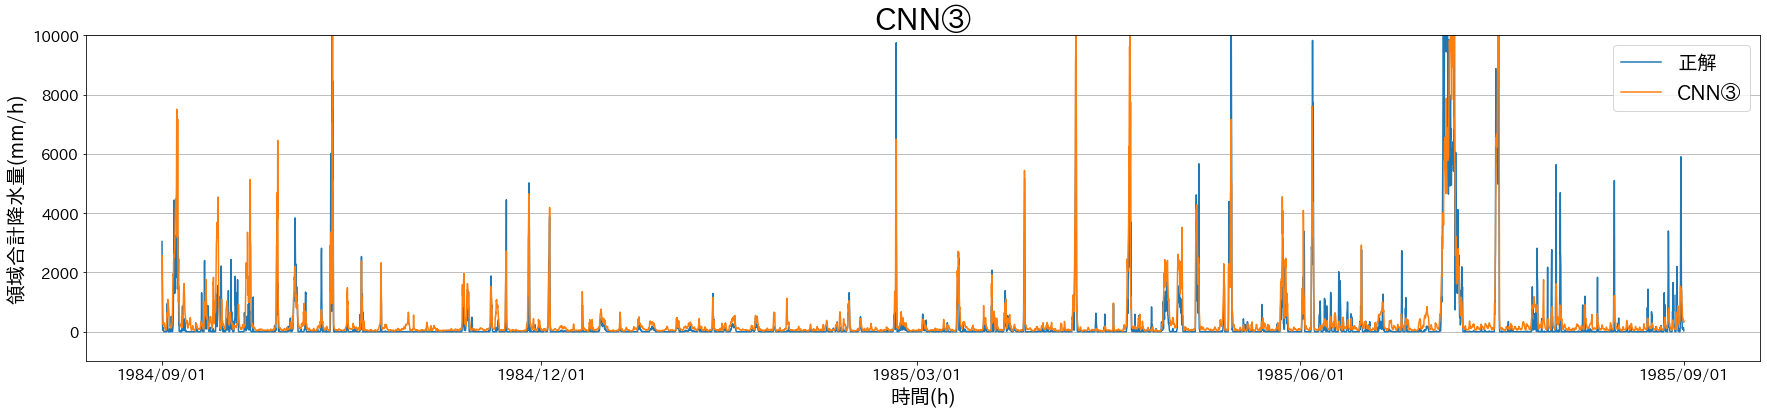

In [ ]:
titles = ['正解', '入力', 'MLP', 'CNN①', 'CNN②', 'CNN③']
for i, title in enumerate(titles[1:]):
  plt.figure(figsize=(30,6))
  plt.plot(data[:,:900].sum(axis=1))
  plt.plot(data[:,(i+1)*6300:(i+1)*6300+900].sum(axis=1))
  plt.xticks(ticks=[0,2184,4344,6552,8760], labels=['1984/09/01', '1984/12/01', '1985/03/01', '1985/06/01', '1985/09/01'], fontsize=15)
  plt.yticks(fontsize=15)
  plt.xlabel('時間(h)', fontsize=20)
  plt.ylabel('領域合計降水量(mm/h)', fontsize=20)
  plt.ylim(-1000,10000)
  plt.title(title, fontsize=30)
  plt.grid(axis='y')
  plt.legend([titles[0], title], fontsize=20)
  plt.show()

### 気温(T)

#### 領域平均気温

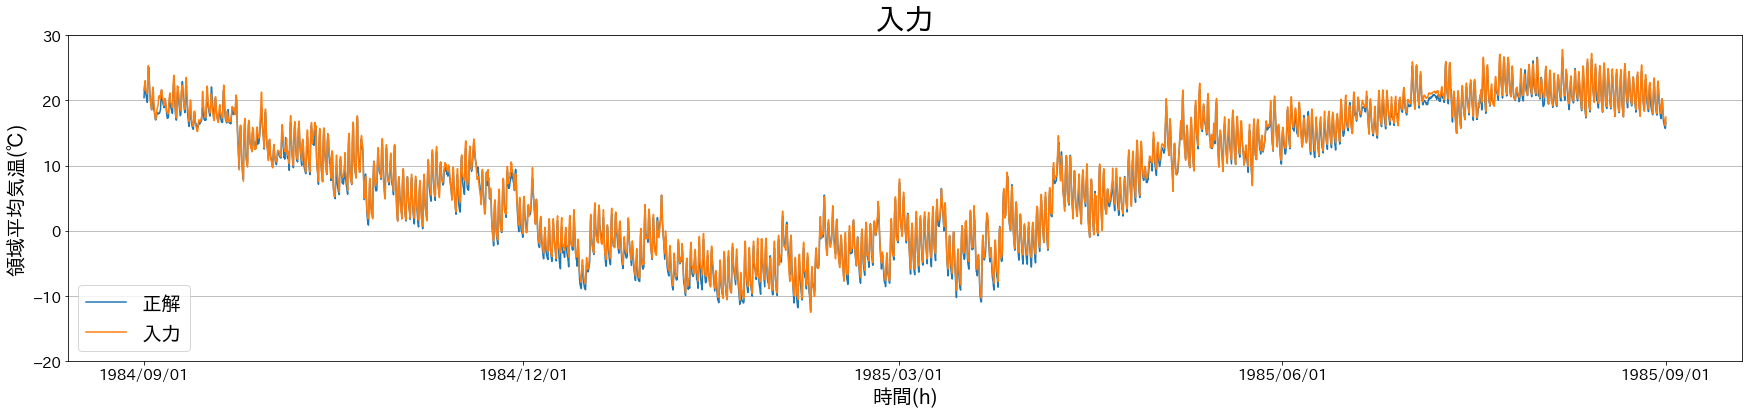

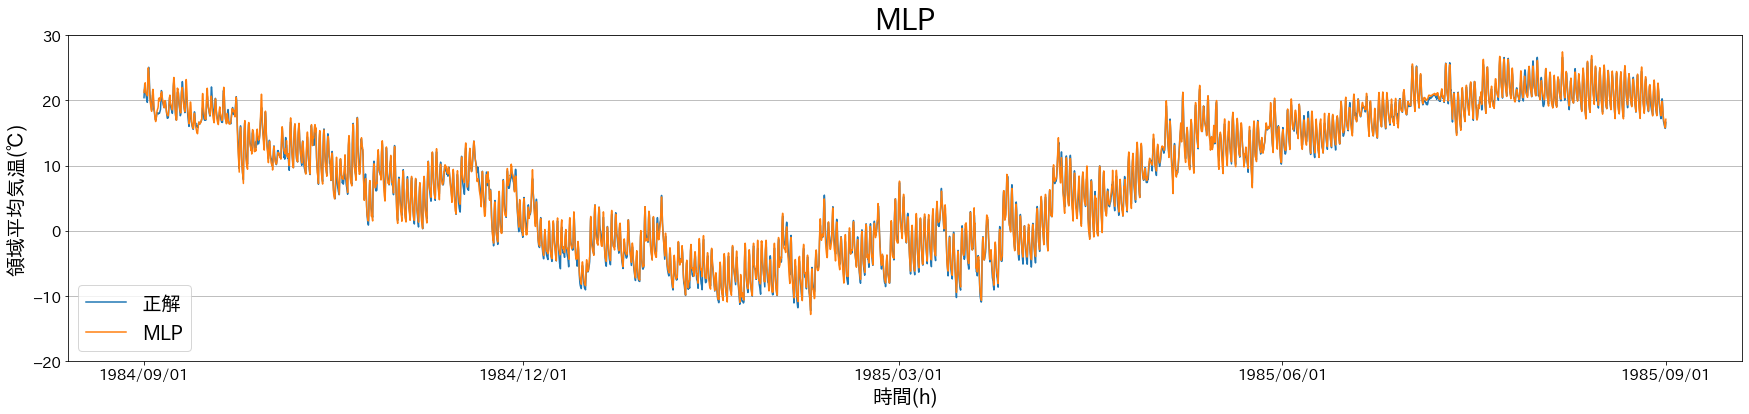

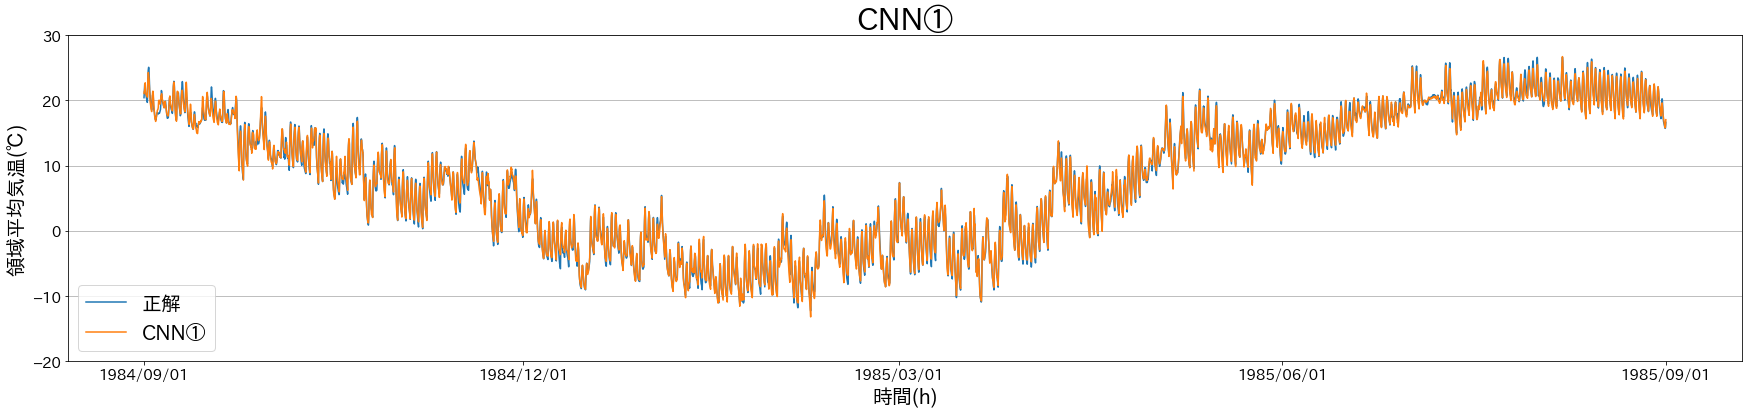

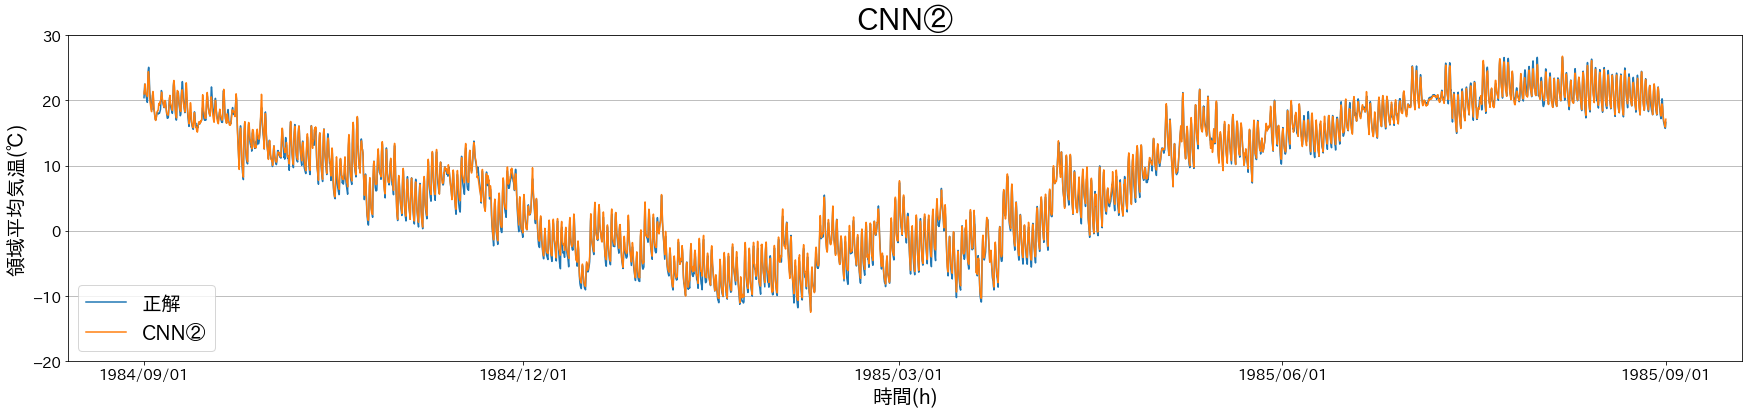

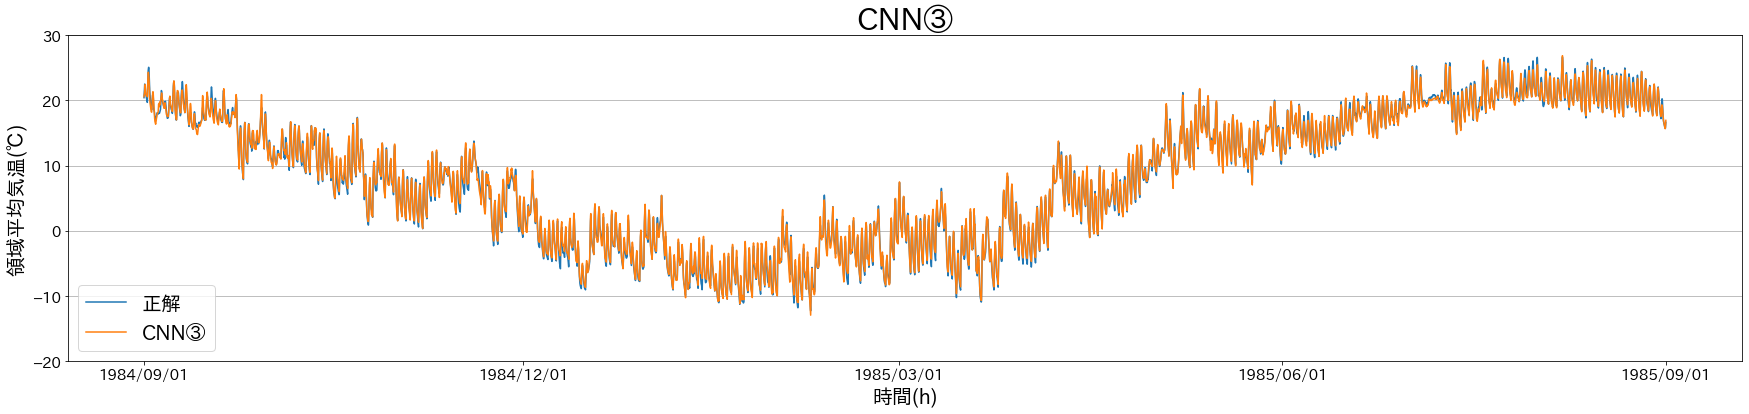

In [ ]:
titles = ['正解', '入力', 'MLP', 'CNN①', 'CNN②', 'CNN③']
for i, title in enumerate(titles[1:]):
  plt.figure(figsize=(30,6))
  plt.plot(data[:,900:1800].mean(axis=1)-273.15)
  plt.plot(data[:,(i+1)*6300+900:(i+1)*6300+1800].mean(axis=1)-273.15)
  plt.xticks(ticks=[0,2184,4344,6552,8760], labels=['1984/09/01', '1984/12/01', '1985/03/01', '1985/06/01', '1985/09/01'], fontsize=15)
  plt.yticks(fontsize=15)
  plt.xlabel('時間(h)', fontsize=20)
  plt.ylabel('領域平均気温(℃)', fontsize=20)
  plt.ylim(-20,30)
  plt.title(title, fontsize=30)
  plt.grid(axis='y')
  plt.legend([titles[0], title], fontsize=20)
  plt.show()

### 湿数(R)

#### 領域平均湿数

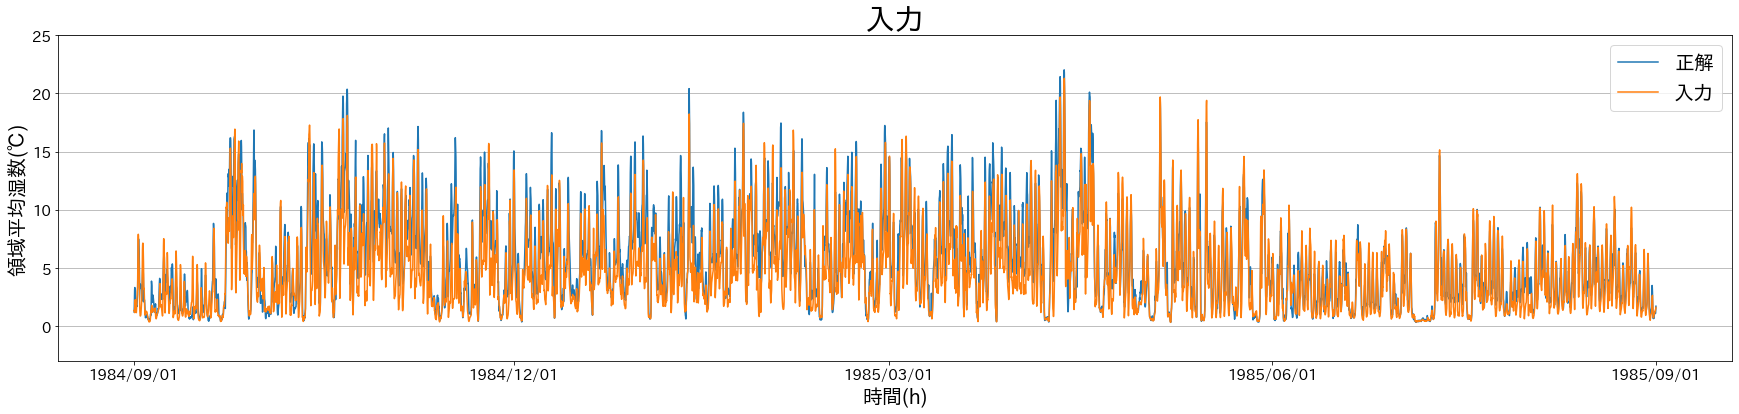

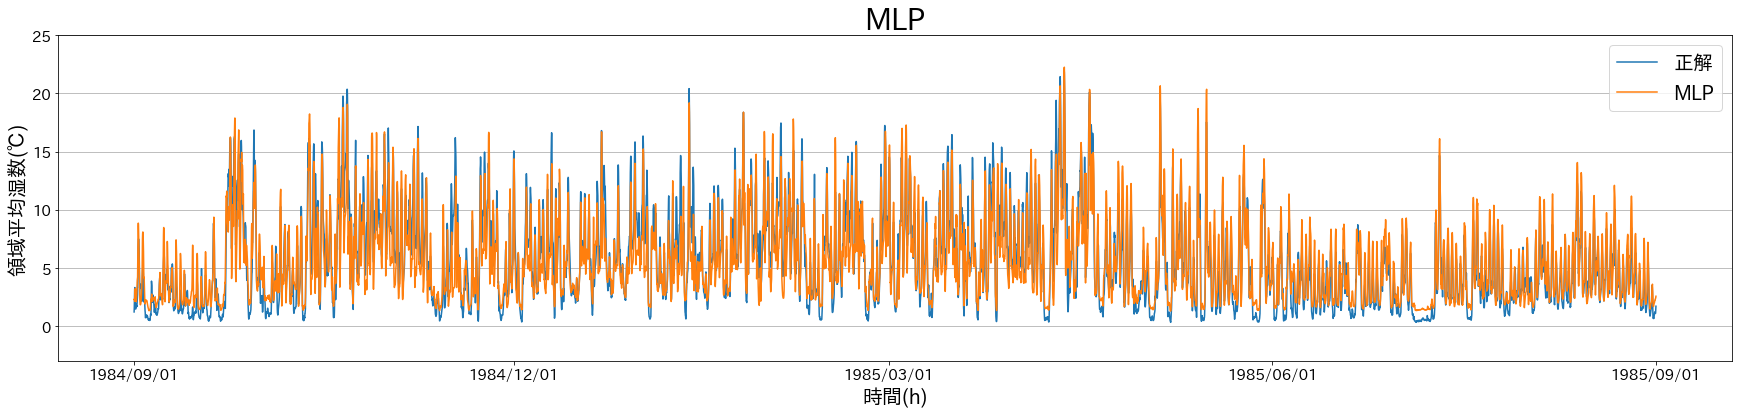

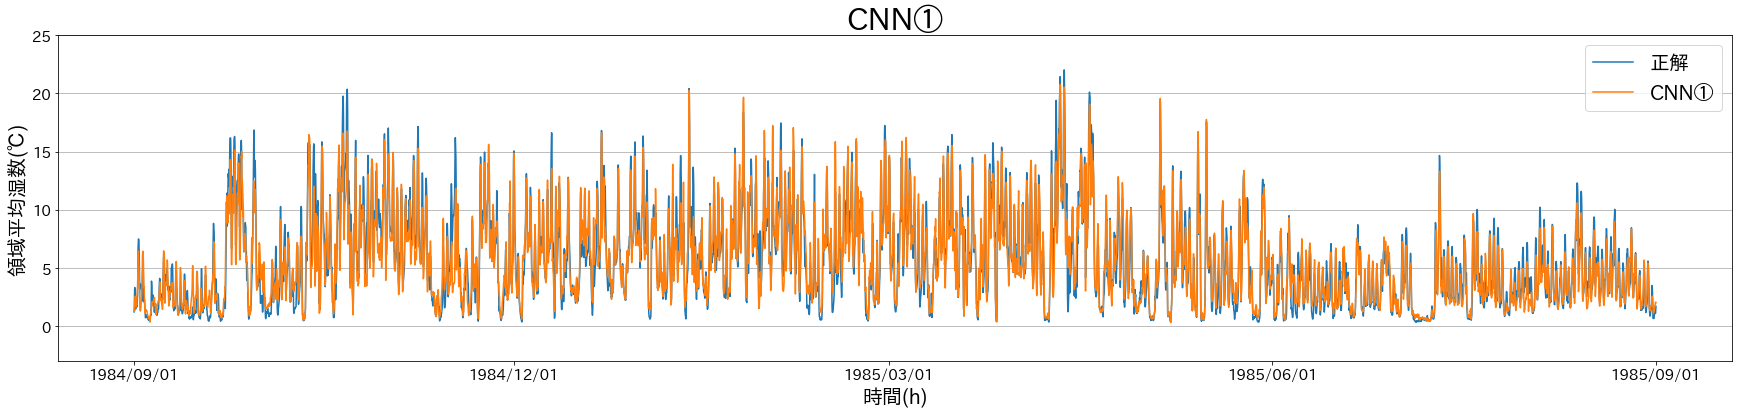

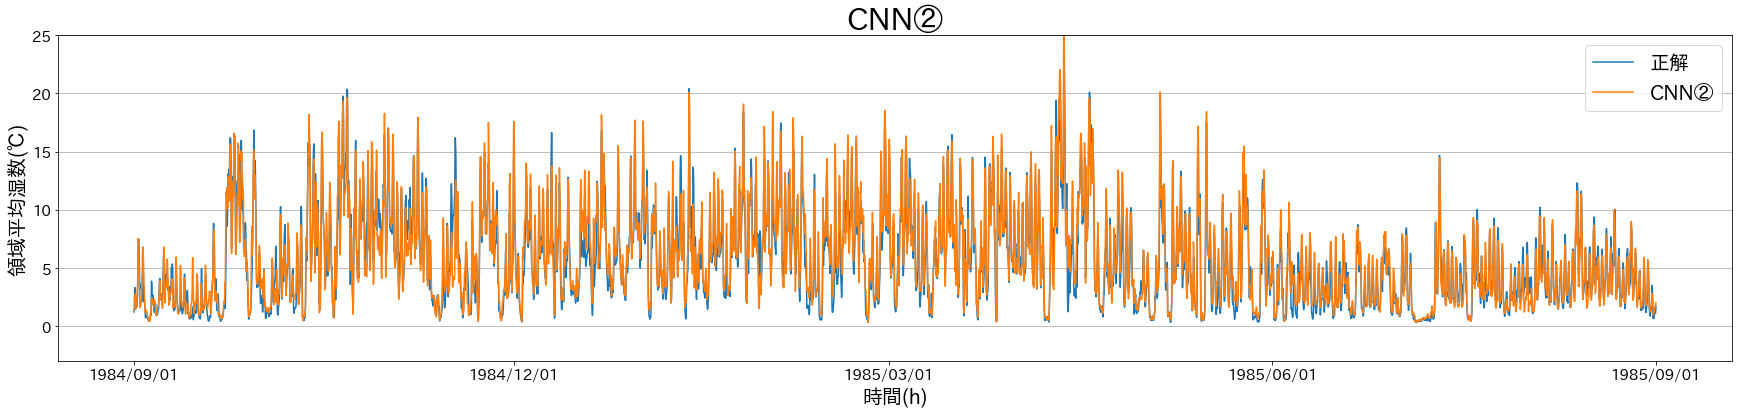

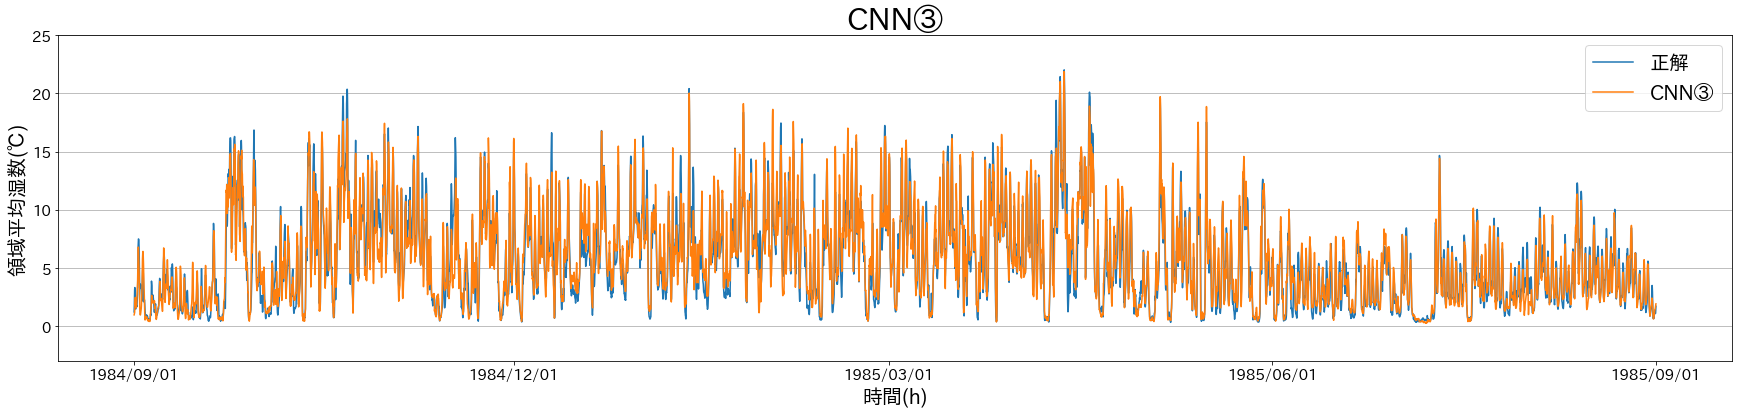

In [ ]:
titles = ['正解', '入力', 'MLP', 'CNN①', 'CNN②', 'CNN③']
for i, title in enumerate(titles[1:]):
  plt.figure(figsize=(30,6))
  plt.plot(data[:,1800:2700].mean(axis=1))
  plt.plot(data[:,(i+1)*6300+1800:(i+1)*6300+2700].mean(axis=1))
  plt.xticks(ticks=[0,2184,4344,6552,8760], labels=['1984/09/01', '1984/12/01', '1985/03/01', '1985/06/01', '1985/09/01'], fontsize=15)
  plt.yticks(fontsize=15)
  plt.xlabel('時間(h)', fontsize=20)
  plt.ylabel('領域平均湿数(℃)', fontsize=20)
  plt.ylim(-3,25)
  plt.title(title, fontsize=30)
  plt.grid(axis='y')
  plt.legend([titles[0], title], fontsize=20)
  plt.show()

### 風速(W)

#### 領域平均風速

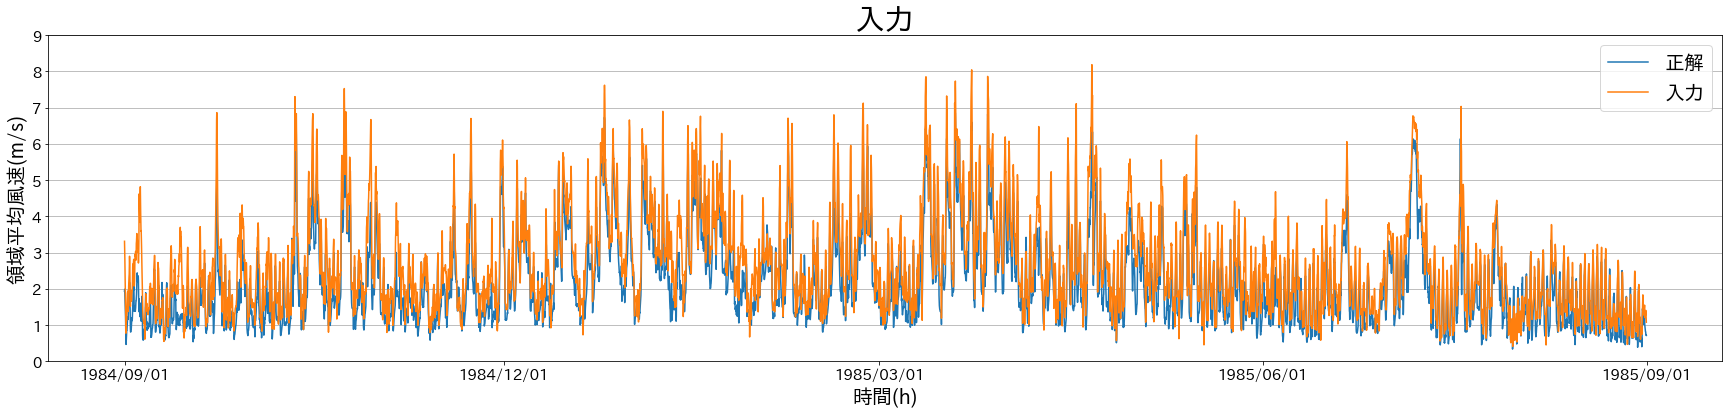

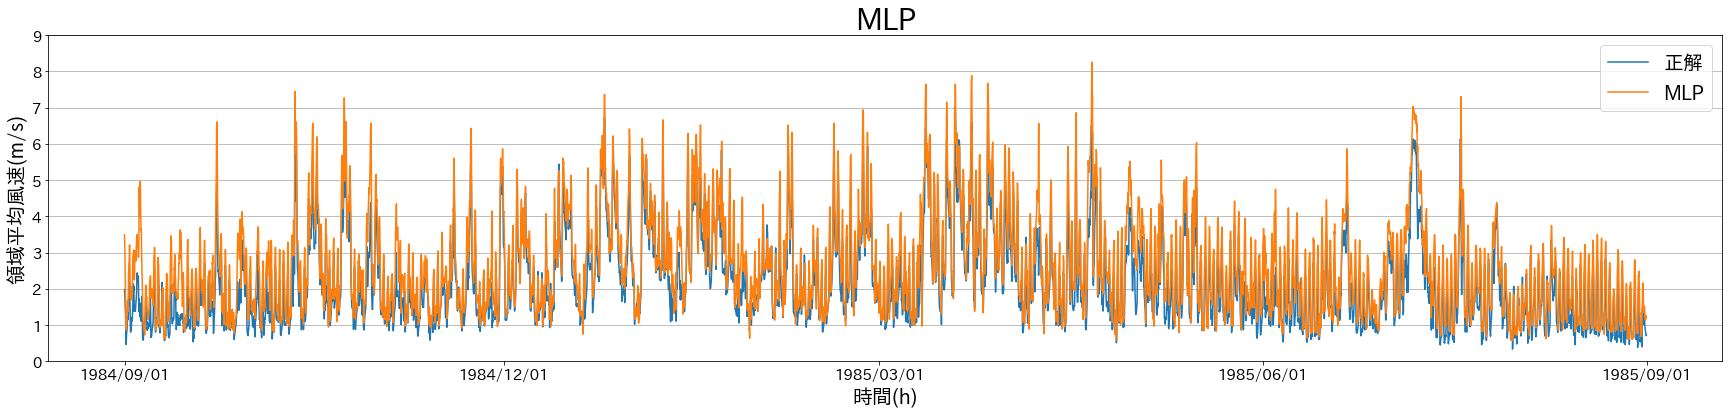

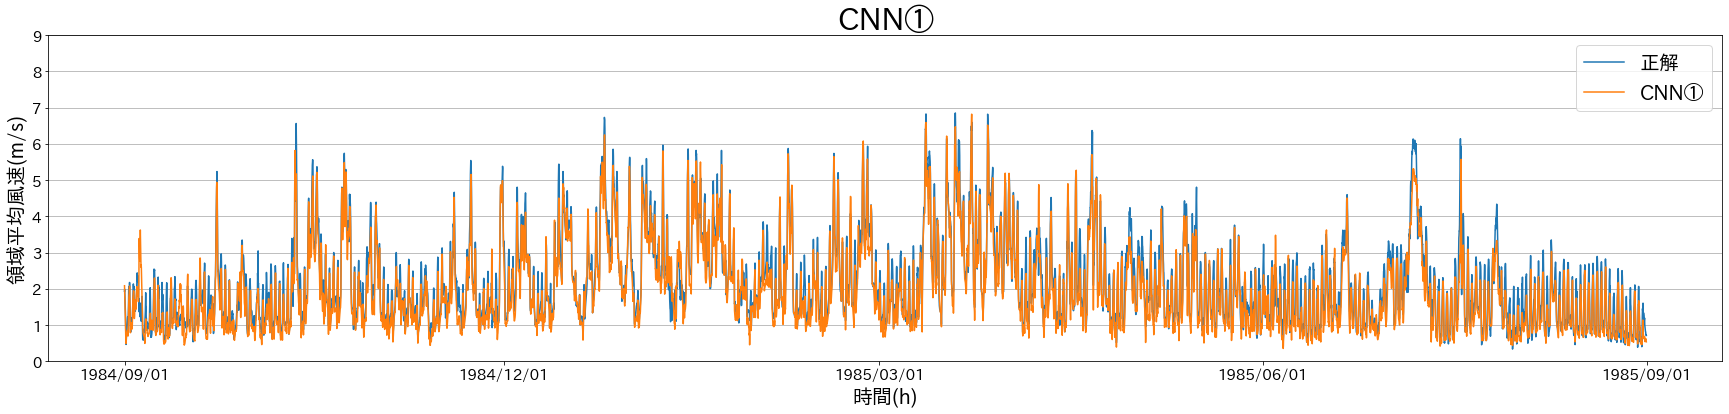

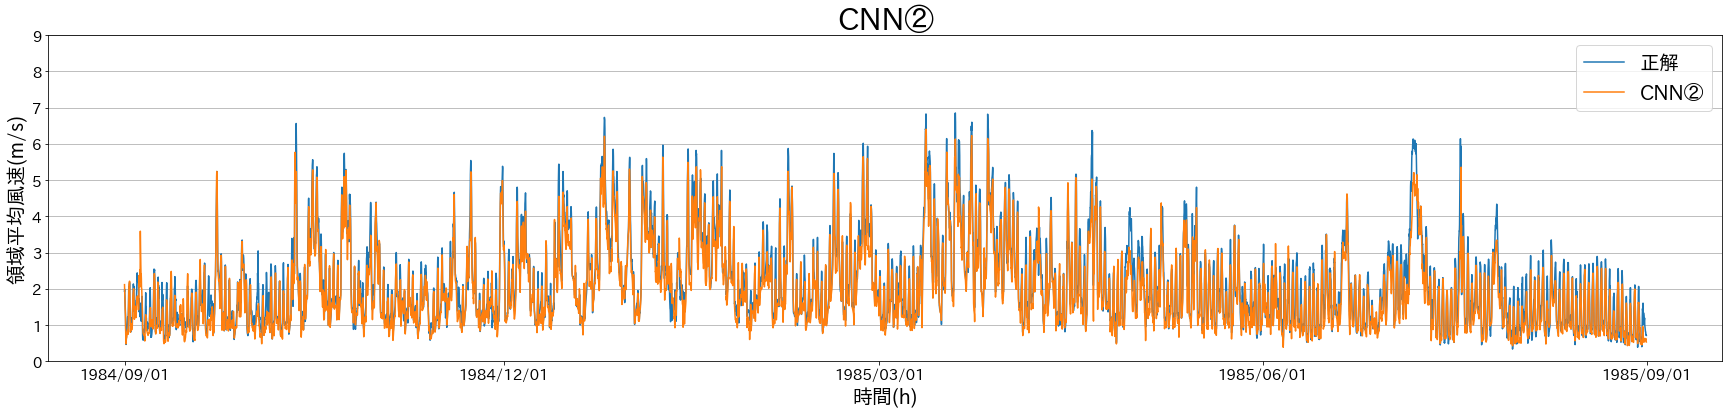

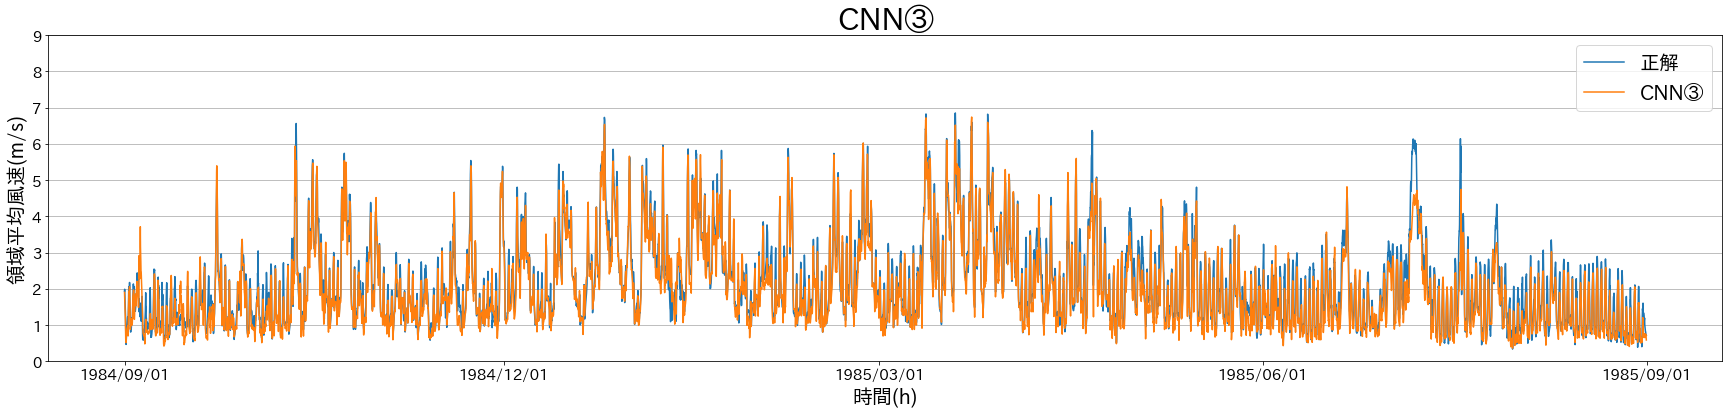

In [ ]:
titles = ['正解', '入力', 'MLP', 'CNN①', 'CNN②', 'CNN③']
for i, title in enumerate(titles[1:]):
  plt.figure(figsize=(30,6))
  plt.plot(data[:,4500:5400].mean(axis=1))
  plt.plot(data[:,(i+1)*6300+4500:(i+1)*6300+5400].mean(axis=1))
  plt.xticks(ticks=[0,2184,4344,6552,8760], labels=['1984/09/01', '1984/12/01', '1985/03/01', '1985/06/01', '1985/09/01'], fontsize=15)
  plt.yticks(fontsize=15)
  plt.xlabel('時間(h)', fontsize=20)
  plt.ylabel('領域平均風速(m/s)', fontsize=20)
  plt.ylim(0,9)
  plt.title(title, fontsize=30)
  plt.grid(axis='y')
  plt.legend([titles[0], title], fontsize=20)
  plt.show()

#### 領域最大風速

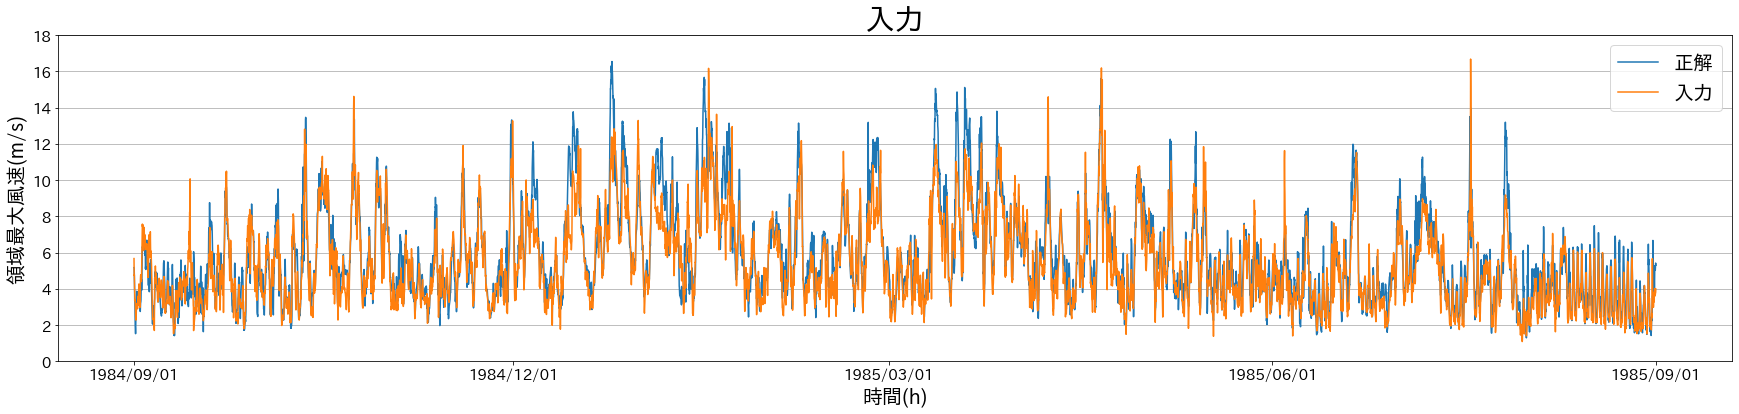

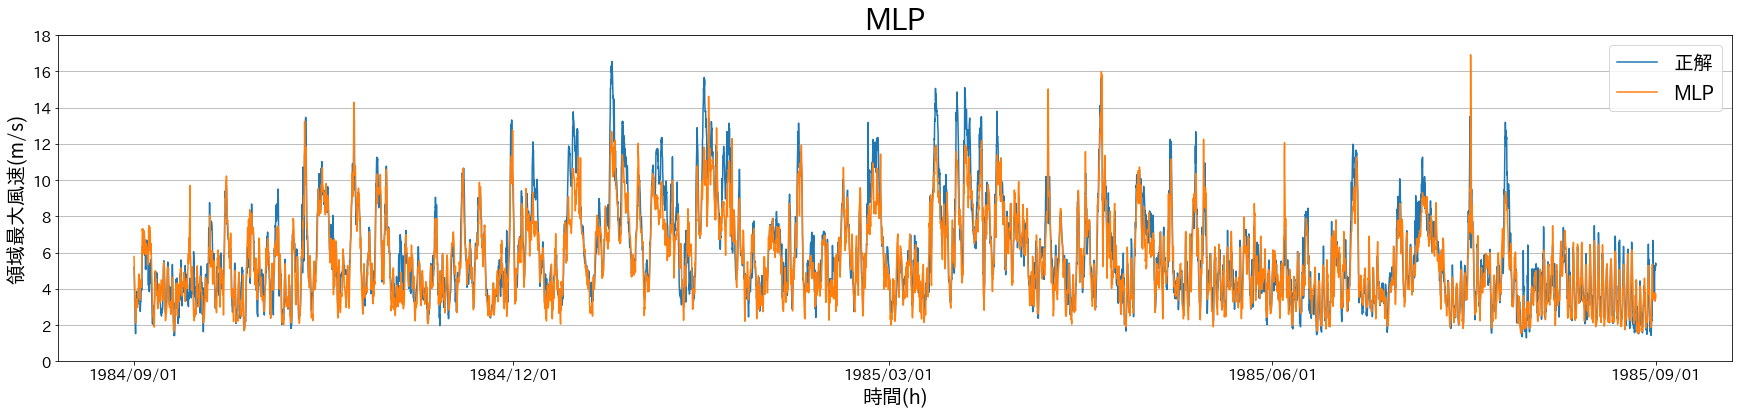

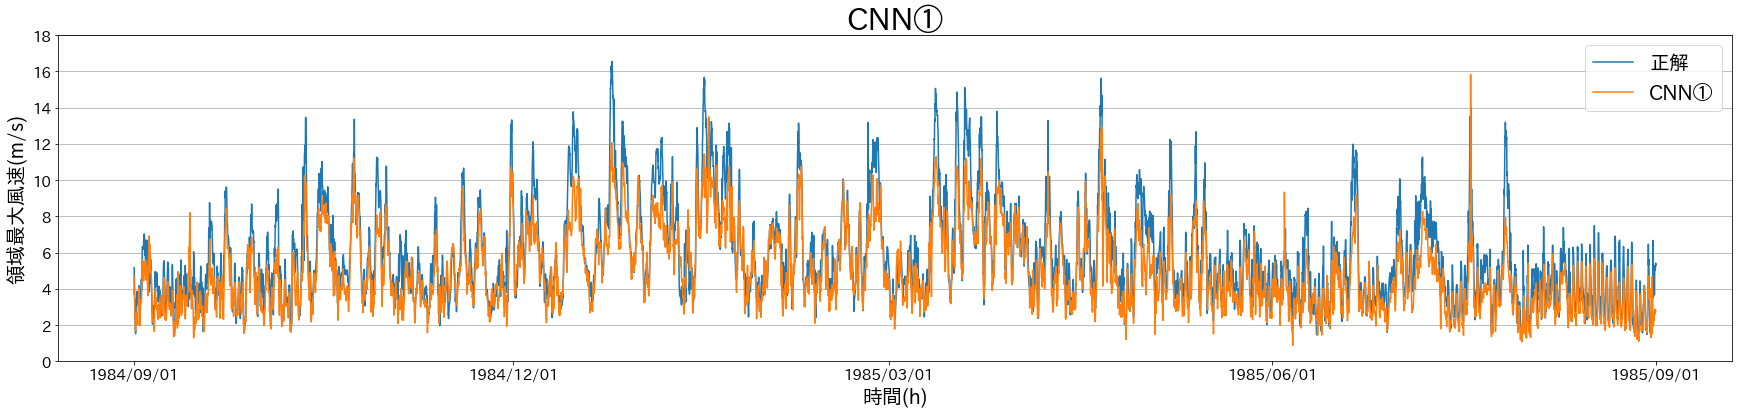

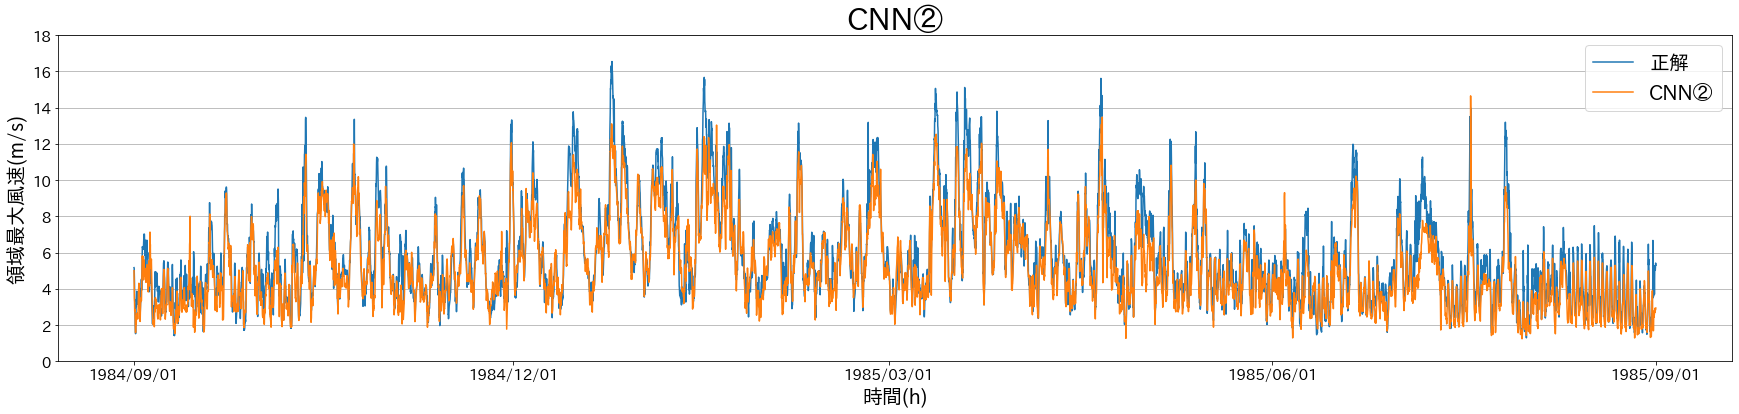

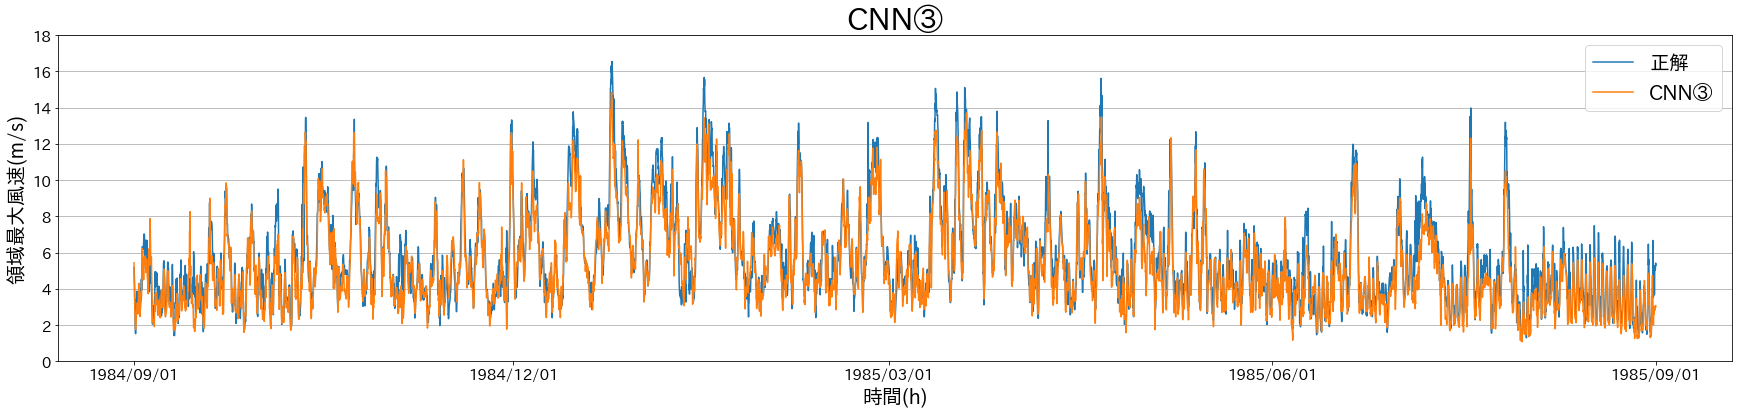

In [ ]:
titles = ['正解', '入力', 'MLP', 'CNN①', 'CNN②', 'CNN③']
for i, title in enumerate(titles[1:]):
  plt.figure(figsize=(30,6))
  plt.plot(data[:,4500:5400].max(axis=1))
  plt.plot(data[:,(i+1)*6300+4500:(i+1)*6300+5400].max(axis=1))
  plt.xticks(ticks=[0,2184,4344,6552,8760], labels=['1984/09/01', '1984/12/01', '1985/03/01', '1985/06/01', '1985/09/01'], fontsize=15)
  plt.yticks(fontsize=15)
  plt.xlabel('時間(h)', fontsize=20)
  plt.ylabel('領域最大風速(m/s)', fontsize=20)
  plt.ylim(0,18)
  plt.title(title, fontsize=30)
  plt.grid(axis='y')
  plt.legend([titles[0], title], fontsize=20, loc='upper right')
  plt.show()